<a href="https://colab.research.google.com/github/varekarprajwal/Tomato-Defect-Detection/blob/GoogleColab/TOMATO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
!pip install rembg
!pip install rembg onnxruntime
!pip install scikit-image -q
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import numpy as np
from rembg import remove

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Project/TOMATO PROJECT/tomato

Mounted at /content/drive
/content/drive/MyDrive/Project/TOMATO PROJECT/tomato


In [ ]:
# Define our imshow function
def imshow(title = "Image", image = None, size = 4):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Define our emove_background_advanced function
def remove_background_advanced(input_path, output_path, alpha_matte=False, background_color=(155, 155, 155)):
    with open(input_path, "rb") as input_file, open(output_path, "wb") as output_file:
        input_data = input_file.read()

        # Use advanced options
        output_data =remove(input_data, alpha_matte=alpha_matte, background_color=background_color)
        output_file.write(output_data)

In [ ]:
# import time
# %cd /content/sample_data
# ldseg=np.array(os.listdir('Fresh'))
# time.sleep(3)
# len(ldseg)

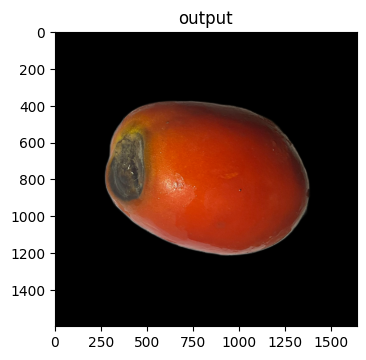

In [ ]:
# image_15.jpg _17.jpeg _19.jpeg _23.jpeg
input_path ="/content/drive/MyDrive/Project/TOMATO PROJECT/tomato/image_15.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
output = cv2.imread("output_image_advanced.jpg")
len(output)
imshow('output', output)

In [ ]:
output.shape


(1598, 1640, 3)

481
17756.5
552.6589421033859


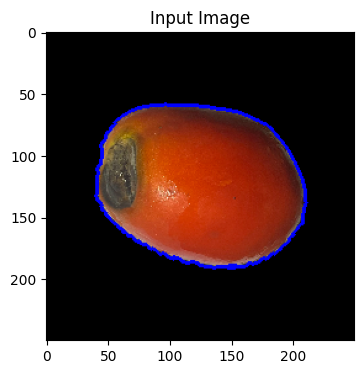

In [ ]:
image =cv2.resize(output, (250, 250), interpolation = cv2.INTER_LINEAR)
copy = image.copy()
imgu_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

lower= np.array([10,10])
upper= np.array([255,255])

#mask = cv2.inRange(imgu_hsv, lower, upper)
_, th2 = cv2.threshold(imgu_hsv, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#only convert to background to black
#invert=cv2.bitwise_not(th2)

contours, hierarchy = cv2.findContours(imgu_hsv,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE )
cont_img=cv2.drawContours(imgu_hsv, contours, -1, 255, 3)


c = max(contours,key=cv2.contourArea)
x,y,w,h=cv2.boundingRect(c)

x1=x
x2=x1+w
y1=y
y2=y1+h
rect = (x1,y1,x2-x1,y2-y1)
copy_1= copy.copy()
copy_2= copy.copy()
print(len(c))
# Calculate area of the largest contour
tomato_area = cv2.contourArea(c)
perimeter = cv2.arcLength(c, True)
print(tomato_area)
print(perimeter)
# Draw the contour and area on the image
cv2.rectangle(copy_1, (x,y), (x+w,y+h), (255,0,255), 2)

# Draw the contour and area on the image
cv2.drawContours(copy, c, -1, (255, 0, 0), 2)

# imshow('mask 0', imgu_hsv)
# imshow('mask 0', th2)
# imshow('mask 0', cont_img)
# imshow("Input Image", copy_1)
imshow("Input Image", copy)

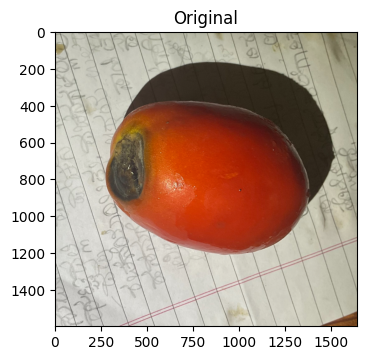

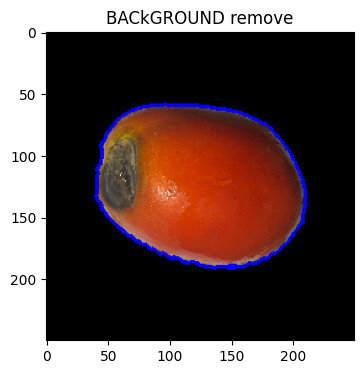

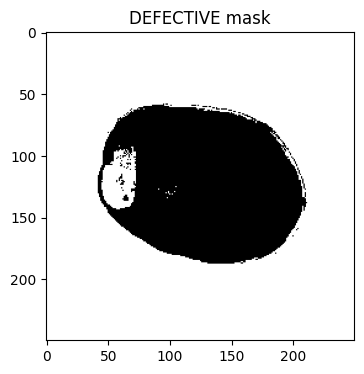

In [ ]:
img_hsv = cv2.cvtColor(copy_2 ,cv2.COLOR_BGR2HSV)

# lower mask RED
lower_red0 = np.array([0,40,40])
upper_red0 = np.array([17,255,255])
mask0 = cv2.inRange(img_hsv, lower_red0, upper_red0)

# upper mask RED
lower_red1 = np.array([170,10,10])
upper_red1 = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)

red_mask = mask0+mask1
red_part = cv2.bitwise_and(image, image, mask=red_mask)

# mask GREEN
lower_green = np.array([35,10,10])
upper_green = np.array([75,255,255])
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)
green_part = cv2.bitwise_and(image, image, mask=green_mask)

# mask YELLOW
lower_yellow = np.array([20,110,10])
upper_yellow = np.array([35,255,700])
yellow_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
yellow_part = cv2.bitwise_and(image, image, mask=yellow_mask)

# mask DEFECTIVE
lower_gray = np.array([0, 0, 0])
upper_gray = np.array([180, 90, 255])
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)
Defective = cv2.bitwise_and(image, image, mask=mask)


imshow('Original', input)
#imshow('mask_0', mask0)
#imshow('mask_1', mask1)
#imshow('RED mask', red_mask)
#imshow('Red Area', red_part)
#imshow('GREEN mask', green_mask)
#imshow('green part ', green_part)
#imshow('YELLOW mask', yellow_mask)
#imshow('YELLOW part ', yellow_part)
imshow('BACkGROUND remove', copy)
imshow('DEFECTIVE mask', mask)
#imshow('DEFECTIVE part', Defective)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

In [ ]:
img = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape

(1598, 1640)

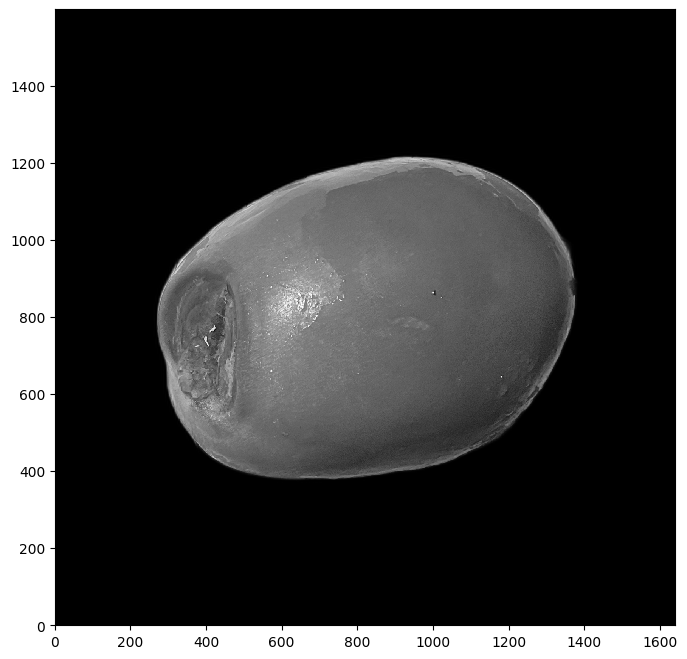

In [ ]:
plt.figure(figsize=(8,8))
plt.pcolormesh(img, cmap='Greys_r')

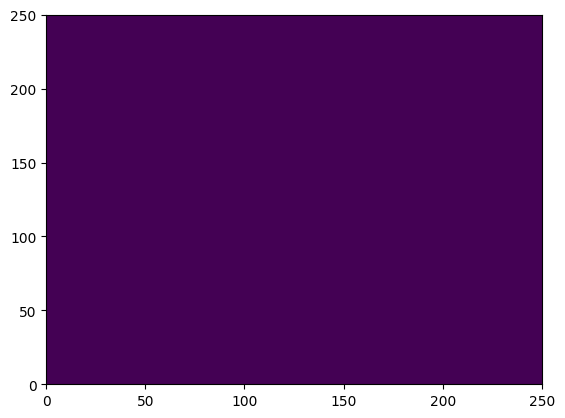

In [ ]:
mask = mask < 10
plt.pcolormesh(mask)

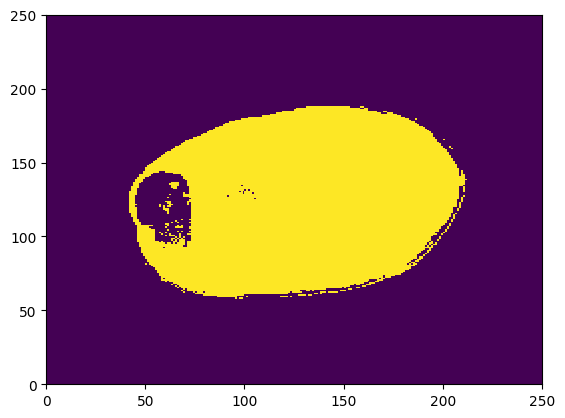

In [ ]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask)

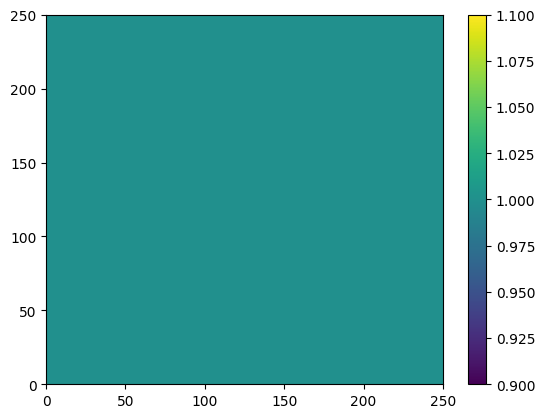

In [ ]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
plt.pcolormesh(mask_labeled)
plt.colorbar()

In [ ]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

In [ ]:
image = img_as_ubyte(rgb2gray(cv2.cvtColor(cv2.imread("output_image_advanced.jpg"), cv2.COLOR_BGR2RGB)))#(io.imread("/content/output_image_advanced.jpg")))

In [ ]:
image = img_as_ubyte(rgb2gray(io.imread("/content/drive/MyDrive/Project/TOMATO PROJECT/tomato/image_15.jpg")))

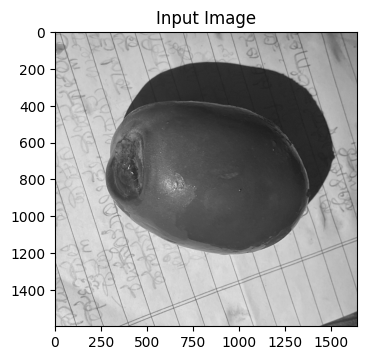

In [ ]:
imshow("Input Image", image)

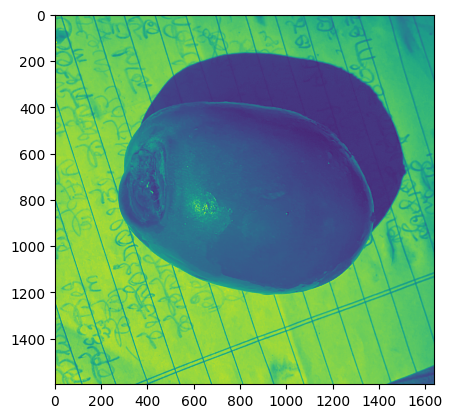

In [ ]:
plt.imshow(image)

In [ ]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)

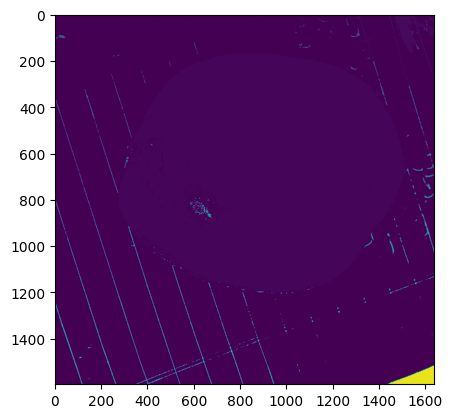

In [ ]:
label_image = measure.label(image < threshold, connectivity=image.ndim)
plt.imshow(label_image)

In [ ]:
import matplotlib.pyplot as plt
from skimage import measure, io, img_as_ubyte
import numpy as np
import cv2
import pandas as pd
from scipy import ndimage as nd
from skimage.color import label2rgb

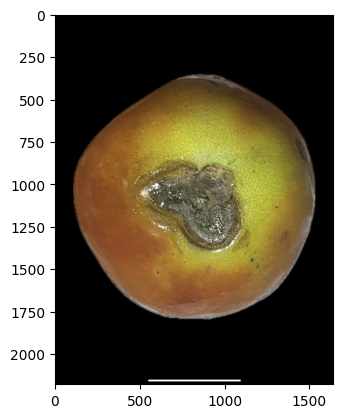

In [ ]:
# image_15.jpg _17.jpeg _19.jpeg _23.jpeg
input_path ="/content/drive/MyDrive/Project/TOMATO PROJECT/tomato/image_6.jpg"
output_image= "output_image_advanced.jpg"
plt.imshow(io.imread(input_path))

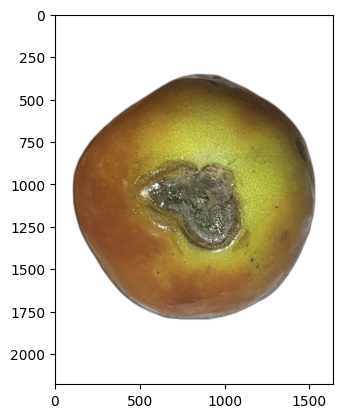

In [ ]:
img = io.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
output = io.imread(output_image)
plt.imshow(output)

In [ ]:
img_hsv = cv2.cvtColor(output,cv2.COLOR_RGB2HSV)

# mask DEFECTIVE
lower_gray = np.array([0, 0, 0])
upper_gray = np.array([180, 90, 255])
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)
#Defective = cv2.bitwise_and(image, image, mask=mask)

# lower mask RED
lower_red0 = np.array([0,40,40])
upper_red0 = np.array([17,255,255])
mask0 = cv2.inRange(img_hsv, lower_red0, upper_red0)

# upper mask RED
lower_red1 = np.array([170,10,10])
upper_red1 = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)

red_mask = mask0+mask1


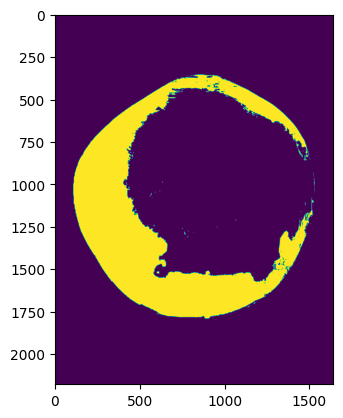

In [ ]:
plt.imshow(red_mask)

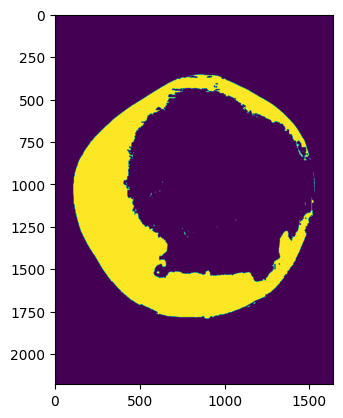

In [ ]:
closed_mask = nd.binary_closing(red_mask, np. ones ((5,5)))
plt.imshow(closed_mask)

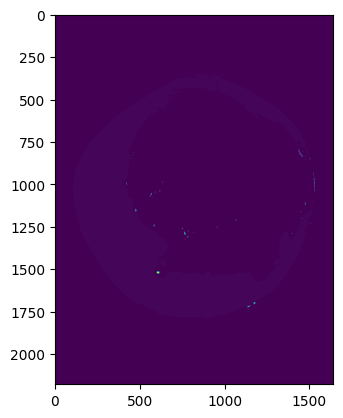

In [ ]:
label_image = measure.label(closed_mask)
plt.imshow(label_image)

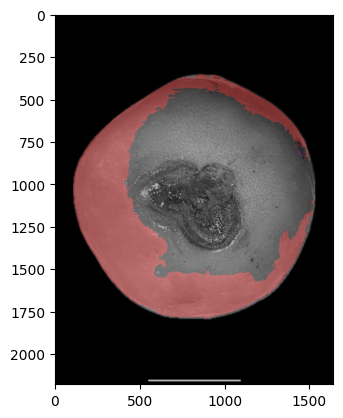

In [ ]:
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [ ]:
props = measure.regionprops_table(label_image, output,properties=[ 'label', 'area', 'perimeter', 'solidity'])
df = pd.DataFrame(props)
df.head()

label    area     perimeter  solidity
0      1  624665  11174.030335  0.402535
1      2      28     24.000000  0.666667
2      3       4      2.000000  1.000000
3      4       1      0.000000  1.000000
4      5       4      4.000000  1.000000

Detected defects: [(1507, 1566), (326, 924), (449, 917), (418, 914), (483, 847), (596, 825), (598, 774), (620, 560), (381, 463), (406, 426), (348, 379)]


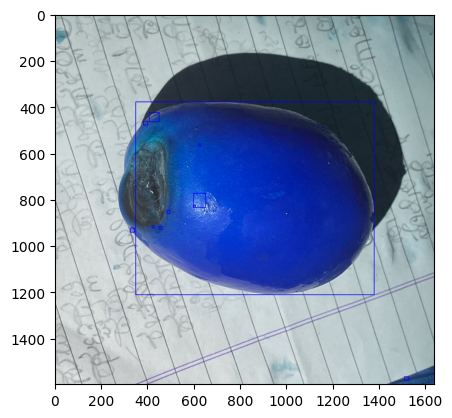

In [ ]:
import cv2
import numpy as np

def detect_tomato_defects(image_path):
    """
    Detects defects in a tomato image using color thresholding and morphological operations.

    Args:
        image_path: Path to the image file.

    Returns:
        A tuple containing:
            - The processed image with detected defects highlighted.
            - A list of defect coordinates (x, y).
    """

    # Load the image
    img = cv2.imread(image_path)

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for the color of defects (adjust as needed)
    lower_bound = np.array([0, 50, 50])  # Lower bound for HSV values
    upper_bound = np.array([10, 255, 255])  # Upper bound for HSV values

    # Create a mask for the defect color
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Apply morphological operations to refine the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the detected defects
    defect_coords = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
        defect_coords.append((x, y))

    return img, defect_coords

# Example usage
image_path = '/content/drive/MyDrive/Project/TOMATO PROJECT/tomato/image_15.jpg'
processed_img, defects = detect_tomato_defects(image_path)

# Display the result
plt.imshow(processed_img)


print("Detected defects:", defects)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_color_mask(hsv, lower, upper):
    mask = cv2.inRange(hsv, lower, upper)
    return mask

def classify_tomato_colors(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for classification
    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([179, 255, 255])
    green_lower = np.array([35, 50, 50])
    green_upper = np.array([85, 255, 255])
    defect_lower = np.array([10, 50, 0])
    defect_upper = np.array([25, 255, 255])  # e.g., yellow/brownish

    # Generate masks
    red_mask1 = get_color_mask(hsv, red_lower1, red_upper1)
    red_mask2 = get_color_mask(hsv, red_lower2, red_upper2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    green_mask = get_color_mask(hsv, green_lower, green_upper)
    defect_mask = get_color_mask(hsv, defect_lower, defect_upper)

    # Combine all into a color map
    color_map = np.zeros_like(image)

    color_map[red_mask > 0] = [0, 0, 255]       # Red
    color_map[green_mask > 0] = [0, 255, 0]     # Green
    color_map[defect_mask > 0] = [0, 255, 255]  # Yellow for defect

    # Show results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Tomato Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Tomato Color Map (Red, Green, Defect)")
    plt.imshow(cv2.cvtColor(color_map, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
#classify_tomato_colors("tomato.jpg")


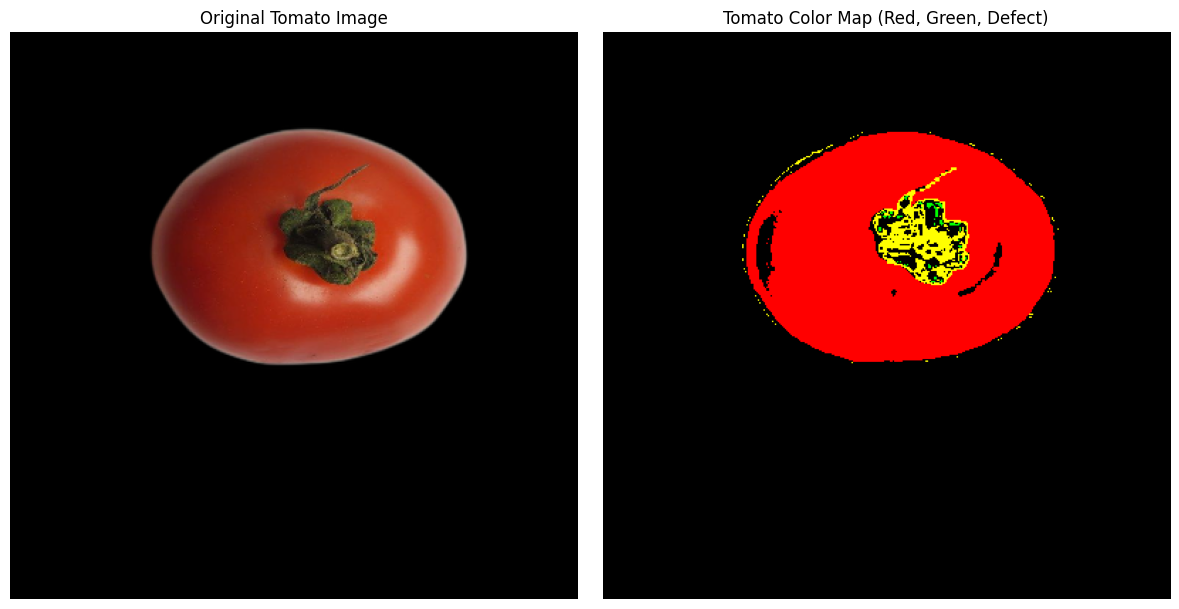

In [ ]:
input_path ="image_11.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
classify_tomato_colors(output_image)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_shadows(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dilated = cv2.dilate(gray, np.ones((7, 7), np.uint8))
    bg = cv2.medianBlur(dilated, 21)
    diff = 255 - cv2.absdiff(gray, bg)
    norm_img = cv2.normalize(diff, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    result = cv2.cvtColor(norm_img, cv2.COLOR_GRAY2BGR)
    return result

def enhance_contrast_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    v = clahe.apply(v)
    enhanced_hsv = cv2.merge([h, s, v])
    return cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

def get_color_mask(hsv, lower, upper):
    return cv2.inRange(hsv, lower, upper)

def classify_tomato_colors(image_path):
    # Step 1: Load and resize
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    # Step 2: Remove shadows and enhance contrast
    no_shadow = remove_shadows(image)
    enhanced = enhance_contrast_hsv(no_shadow)
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

    # Step 3: Convert to HSV
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    # Step 4: Use relaxed HSV thresholds
    red_mask1 = get_color_mask(hsv, np.array([0, 70, 50]), np.array([10, 255, 255]))
    red_mask2 = get_color_mask(hsv, np.array([160, 70, 50]), np.array([179, 255, 255]))
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    green_mask = get_color_mask(hsv, np.array([30, 40, 40]), np.array([90, 255, 255]))
    defect_mask = get_color_mask(hsv, np.array([10, 30, 30]), np.array([40, 255, 200]))

    # Step 5: Print pixel counts for debug
    print("Red pixels:", np.count_nonzero(red_mask))
    print("Green pixels:", np.count_nonzero(green_mask))
    print("Defect pixels:", np.count_nonzero(defect_mask))

    # Step 6: Combine masks into color_map
    color_map = np.zeros_like(image)

    color_map[red_mask > 0] = [0, 0, 255]       # Red
    color_map[green_mask > 0] = [0, 255, 0]     # Green
    color_map[defect_mask > 0] = [0, 255, 255]  # Yellow for defect

    # Step 7: Plot results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Preprocessed")
    plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Color Map (Ripe, Unripe, Defect)")
    plt.imshow(cv2.cvtColor(color_map, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 🔍 Example usage
#classify_tomato_colors("tomato.jpg")  # Replace with your image file


Red pixels: 0
Green pixels: 0
Defect pixels: 0


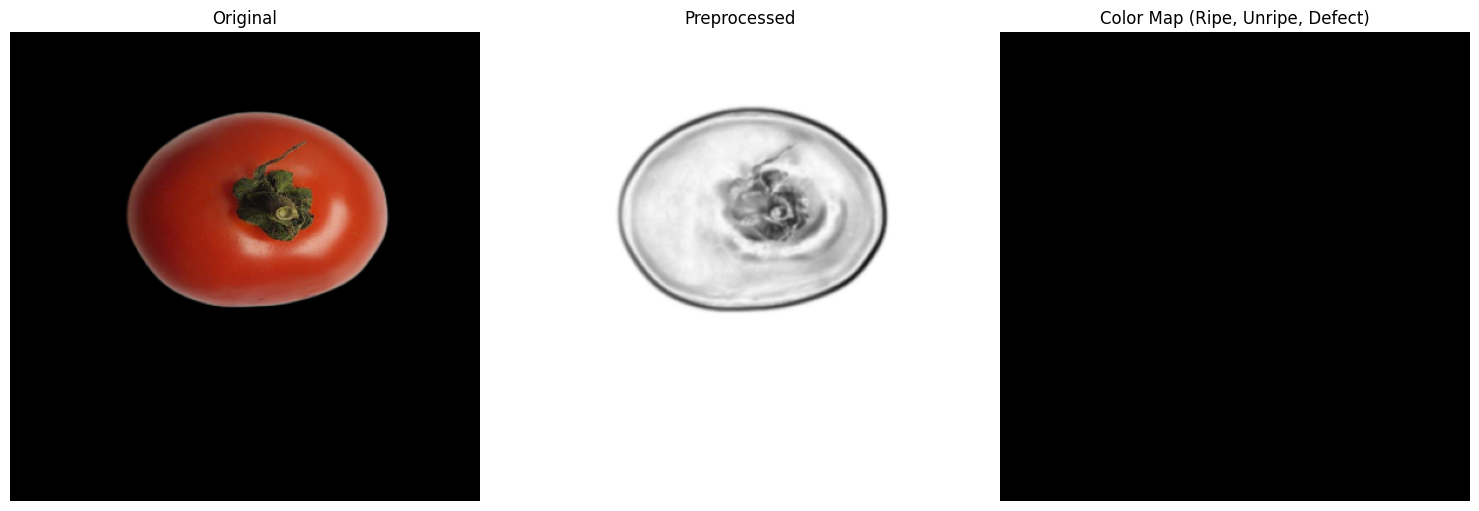

In [ ]:
input_path ="image_11.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
classify_tomato_colors(output_image)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_tomato_colors(image_path):
    """
    Segments a tomato image into red, green, and "defect" color regions
    with improved background removal and refined color ranges.
    The final "Color Cloud" visualization will have a white background.
    """
    # Load the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # --- Step 1: Isolate the fruit from the black background ---
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Threshold to get non-black pixels (the fruit)
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    # Optional: Apply some morphological operations to clean up the mask
    kernel = np.ones((5,5),np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_OPEN, kernel)


    # Apply the fruit mask to remove the background from HSV image
    # We do NOT apply it directly to img to keep the original image for display,
    # but subsequent mask creations will be constrained by fruit_mask.
    hsv_masked = cv2.bitwise_and(hsv, hsv, mask=fruit_mask)
    img_masked = cv2.bitwise_and(img, img, mask=fruit_mask) # For display of masked original


    # --- Step 2: Define and refine HSV color ranges for the fruit ---

    # Red color (still two ranges for hue wrap-around, slightly adjusted for your image)
    # This range captures the main red/orange body of the tomato
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Green/Yellowish-Green color (tuned for the top part of your tomato)
    # This range targets the less saturated, yellowish-green part.
    lower_green_yellow = np.array([20, 30, 50]) # Adjusted lower hue/saturation/value
    upper_green_yellow = np.array([90, 255, 255]) # Adjusted upper hue (broader)


    # Defect/Brown/Black color (tuned for the dark spot)
    # Low saturation and low value are key here, with a broad hue range
    # as defect colors can vary.
    lower_defect = np.array([0, 0, 0])     # Black to very dark
    upper_defect = np.array([180, 255, 80]) # Broad hue, low value (darkness), any saturation


    # --- Step 3: Create masks for each color within the fruit mask ---

    # Mask for red color
    mask_red1 = cv2.inRange(hsv_masked, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_masked, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)
    mask_red = cv2.bitwise_and(mask_red, fruit_mask) # Ensure it's only within the fruit

    # Mask for green/yellowish-green color
    mask_green = cv2.inRange(hsv_masked, lower_green_yellow, upper_green_yellow)
    mask_green = cv2.bitwise_and(mask_green, fruit_mask) # Ensure it's only within the fruit

    # Mask for defect color
    mask_defect = cv2.inRange(hsv_masked, lower_defect, upper_defect)
    # Further refine defect mask: it should NOT be red or green, AND be within fruit
    mask_defect = cv2.bitwise_and(mask_defect, fruit_mask) # Within fruit
    # Remove areas that are already classified as red or green
    mask_defect = cv2.bitwise_and(mask_defect, cv2.bitwise_not(mask_red))
    mask_defect = cv2.bitwise_and(mask_defect, cv2.bitwise_not(mask_green))

    # --- Step 4: Visualize results ---

    # Result for red color
    res_red = cv2.bitwise_and(img_masked, img_masked, mask=mask_red)

    # Result for green color
    res_green = cv2.bitwise_and(img_masked, img_masked, mask=mask_green)

    # Result for defect color
    res_defect = cv2.bitwise_and(img_masked, img_masked, mask=mask_defect)

    # Create a blank image to draw the "cloud" (segmented regions) on
    # Initialize with white color (255, 255, 255 in BGR)
    cloud_image = np.full(img.shape, 255, dtype=np.uint8)

    # Draw segmented regions on the "cloud" image with distinct colors
    # The fruit_mask ensures colors are applied only where the fruit is.
    # We apply colors in order of precedence: defect, then green, then red.
    # This prevents red/green from overwriting defect if there's overlap.
    cloud_image[mask_defect > 0] = [0, 0, 0]      # Black for defect
    cloud_image[mask_green > 0] = [0, 255, 0]     # Green for green parts
    cloud_image[mask_red > 0] = [0, 0, 255]       # Red for red parts

    # The background remains white because cloud_image was initialized white
    # and the color assignments only affect pixels where the masks are > 0.
    # To ensure only the fruit region is colored and the background is white:
    # We invert the fruit mask to get the background mask
    background_mask = cv2.bitwise_not(fruit_mask)
    # Apply this background mask to ensure the cloud_image's background is white
    cloud_image = cv2.bitwise_or(cloud_image, cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR))


    # --- Display results ---
    fig, axes = plt.subplots(1, 5, figsize=(25, 6)) # Increased figure size for better view

    axes[0].imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image (Fruit Masked)')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Red Segments')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Green/Yellow Segments')
    axes[2].axis('off')

    axes[3].imshow(cv2.cvtColor(res_defect, cv2.COLOR_BGR2RGB))
    axes[3].set_title('Defect Segments')
    axes[3].axis('off')

    axes[4].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[4].set_title('Color Cloud (White BG)')
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()

# --- Usage Example ---


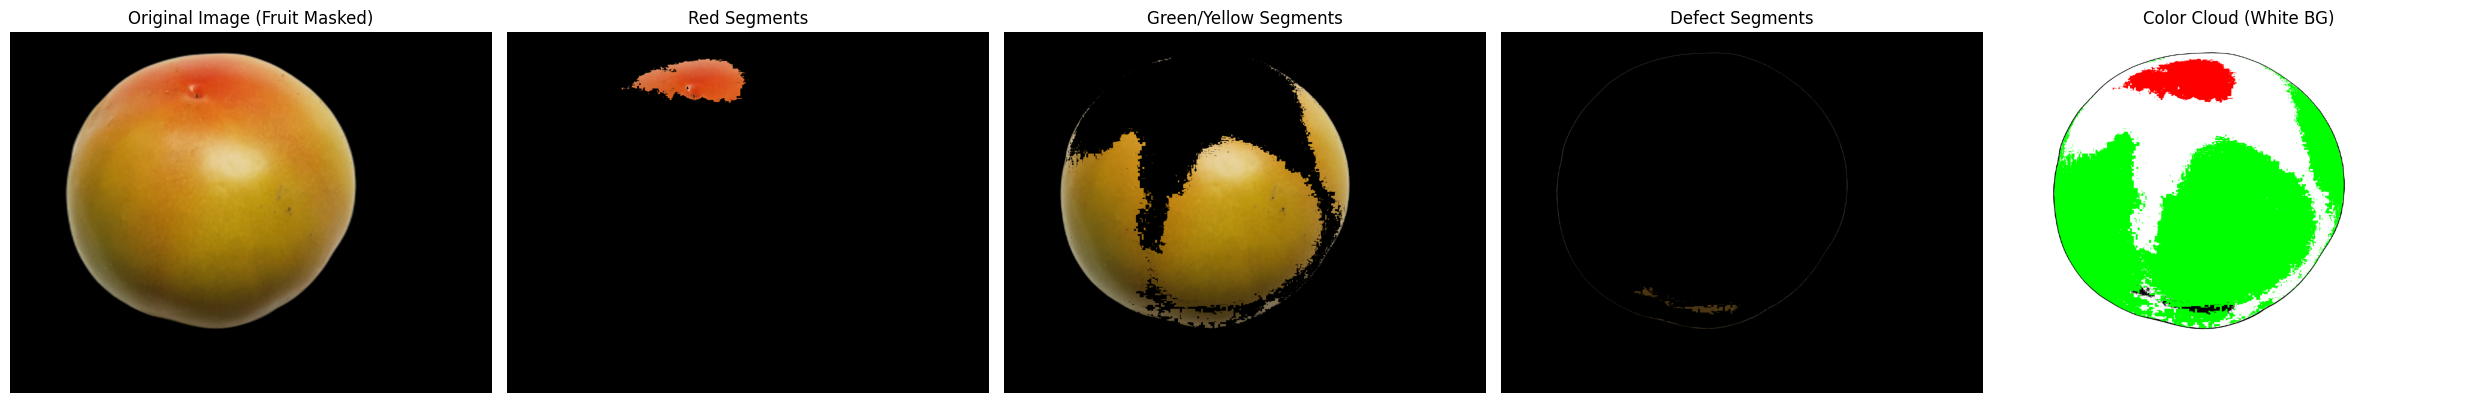

In [ ]:
input_path ="image_8.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
segment_tomato_colors(output_image)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_tomato_colors_with_region_approximation(image_path):
    """
    Segments a tomato image into red, green, and "defect" color regions
    with improved background removal, refined color ranges, and
    an approximation strategy to reduce undefined regions.
    The final "Color Cloud" visualization will have a white background.
    """
    # Load the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # --- Step 1: Isolate the fruit from the black background ---
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7,7),np.uint8) # Slightly larger kernel for robust mask
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_OPEN, kernel)

    img_masked = cv2.bitwise_and(img, img, mask=fruit_mask)
    hsv_masked = cv2.bitwise_and(hsv, hsv, mask=fruit_mask)

    # --- Step 2: Define and refine HSV color ranges based on YOUR IMAGE ---

    # Red/Orange-Red color (for the top part of the tomato)
    # This might need a broader saturation and value range for the lighter parts
    # The hue should cover orange to light red.
    lower_red_orange = np.array([0, 50, 100])  # Hue for orange/red, higher saturation/value
    upper_red_orange = np.array([25, 255, 255]) # Broader hue for orange/light red

    # Green/Yellow-Green color (for the main body of the tomato)
    # This targets the yellowish-green and the less saturated parts.
    lower_green_yellow = np.array([25, 30, 50])  # Adjusted low hue/saturation/value
    upper_green_yellow = np.array([85, 255, 255]) # Adjusted upper hue

    # Defect/Black/Brown color (for the dark spot)
    # Very low value (darkness) is key. Hue and saturation can be broad.
    lower_defect = np.array([0, 0, 0])      # Absolute black
    upper_defect = np.array([180, 100, 70]) # Broad hue, low saturation, very low value (dark)


    # --- Step 3: Create initial masks for each color within the fruit mask ---

    mask_red_orange = cv2.inRange(hsv_masked, lower_red_orange, upper_red_orange)
    mask_red_orange = cv2.bitwise_and(mask_red_orange, fruit_mask)

    mask_green_yellow = cv2.inRange(hsv_masked, lower_green_yellow, upper_green_yellow)
    mask_green_yellow = cv2.bitwise_and(mask_green_yellow, fruit_mask)

    mask_defect = cv2.inRange(hsv_masked, lower_defect, upper_defect)
    mask_defect = cv2.bitwise_and(mask_defect, fruit_mask)


    # --- Step 4: Refine masks and handle overlaps/undefined regions ---

    # Prioritize defect: Ensure defect pixels are only defect
    # Any pixel classified as defect should NOT be red/green
    mask_defect = cv2.bitwise_and(mask_defect, cv2.bitwise_not(mask_red_orange))
    mask_defect = cv2.bitwise_and(mask_defect, cv2.bitwise_not(mask_green_yellow))

    # Create a combined mask of all classified "good" (non-defect) areas
    mask_good_fruit = cv2.bitwise_or(mask_red_orange, mask_green_yellow)

    # Identify unclassified regions WITHIN the fruit mask but NOT in good_fruit or defect
    mask_unclassified = cv2.bitwise_and(fruit_mask, cv2.bitwise_not(cv2.bitwise_or(mask_good_fruit, mask_defect)))


    # --- Step 5: Region Approximation (filling undefined regions) ---
    # We will use dilation and then assign unclassified pixels
    # based on which classified region they are adjacent to.
    # This is a form of label propagation / proximity-based assignment.

    # Create a copy of the fruit mask to assign labels
    final_segmented_labels = np.zeros(fruit_mask.shape, dtype=np.uint8)

    # Assign labels to initially classified regions
    final_segmented_labels[mask_red_orange > 0] = 1 # Red label
    final_segmented_labels[mask_green_yellow > 0] = 2 # Green/Yellow label
    final_segmented_labels[mask_defect > 0] = 3 # Defect label

    # Create a mask of areas that need to be filled (unclassified within fruit)
    mask_to_fill = cv2.bitwise_and(fruit_mask, cv2.bitwise_not(cv2.bitwise_or(mask_good_fruit, mask_defect)))

    # Use a distance transform to find the closest classified pixel for each unclassified pixel
    # First, invert the mask_to_fill so that known regions are 0 and unclassified are high
    # No, better to use the classified pixels as sources for distance transform
    # This requires creating separate distance maps or using a more complex label propagation.

    # A simpler approximation (akin to region growing by expanding dominant regions):
    # Dilate red and green/yellow masks within the fruit boundary
    approx_kernel = np.ones((5,5),np.uint8) # Small kernel to grow slightly

    dilated_red = cv2.dilate(mask_red_orange, approx_kernel, iterations=1)
    dilated_red = cv2.bitwise_and(dilated_red, fruit_mask) # Keep within fruit

    dilated_green = cv2.dilate(mask_green_yellow, approx_kernel, iterations=1)
    dilated_green = cv2.bitwise_and(dilated_green, fruit_mask) # Keep within fruit

    # Now, assign unclassified pixels based on these dilated masks
    # If an unclassified pixel is in dilated_red AND NOT dilated_green, make it red.
    # If an unclassified pixel is in dilated_green AND NOT dilated_red, make it green.
    # If it's in both, or neither, it needs more thought. Prioritize larger region or visual similarity.

    # For simplicity, let's assign unclassified areas that overlap with dilated good regions.
    # Prioritize green/yellow as it's the larger region in this image.
    newly_assigned_green = cv2.bitwise_and(mask_unclassified, dilated_green)
    mask_green_yellow = cv2.bitwise_or(mask_green_yellow, newly_assigned_green)

    # Re-evaluate remaining unclassified
    mask_unclassified = cv2.bitwise_and(fruit_mask, cv2.bitwise_not(cv2.bitwise_or(mask_red_orange, cv2.bitwise_or(mask_green_yellow, mask_defect))))

    newly_assigned_red = cv2.bitwise_and(mask_unclassified, dilated_red)
    mask_red_orange = cv2.bitwise_or(mask_red_orange, newly_assigned_red)

    # Re-evaluate remaining unclassified after the first pass of assignment
    mask_unclassified_final = cv2.bitwise_and(fruit_mask, cv2.bitwise_not(cv2.bitwise_or(mask_red_orange, cv2.bitwise_or(mask_green_yellow, mask_defect))))

    # For any remaining unclassified pixels, if any, assign them to the largest adjacent class
    # (or leave as unclassified for debugging)
    # For now, we can assign them to the main green/yellow body if they are very few.
    # For this specific image, the above dilation should cover most of the fruit.


    # --- Step 6: Visualize results with refined masks ---

    res_red = cv2.bitwise_and(img_masked, img_masked, mask=mask_red_orange)
    res_green = cv2.bitwise_and(img_masked, img_masked, mask=mask_green_yellow)
    res_defect = cv2.bitwise_and(img_masked, img_masked, mask=mask_defect)


    # Create the final "Color Cloud" image with white background
    cloud_image = np.full(img.shape, 255, dtype=np.uint8) # White background

    # Apply colors to the fruit regions
    cloud_image[mask_defect > 0] = [0, 0, 0]        # Black for defect
    cloud_image[mask_green_yellow > 0] = [0, 255, 0] # Green for green/yellow parts
    cloud_image[mask_red_orange > 0] = [0, 0, 255]   # Red for red/orange parts

    # Ensure background is white and outline fruit boundary
    # Invert the fruit mask to get the background mask
    background_mask = cv2.bitwise_not(fruit_mask)
    # Make background explicitly white
    cloud_image = cv2.bitwise_or(cloud_image, cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR))

    # Optionally draw the fruit outline for clarity in the color cloud
    contours, _ = cv2.findContours(fruit_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Draw the largest contour (assuming it's the fruit)
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(cloud_image, [largest_contour], -1, (100, 100, 100), 2) # Grey outline


    # --- Display results ---
    fig, axes = plt.subplots(1, 5, figsize=(25, 6))

    axes[0].imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image (Fruit Masked)')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Red/Orange Segments')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Green/Yellow Segments')
    axes[2].axis('off')

    axes[3].imshow(cv2.cvtColor(res_defect, cv2.COLOR_BGR2RGB))
    axes[3].set_title('Defect Segments')
    axes[3].axis('off')

    axes[4].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[4].set_title('Color Cloud (White BG, Approximated)')
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()

# --- Usage Example ---


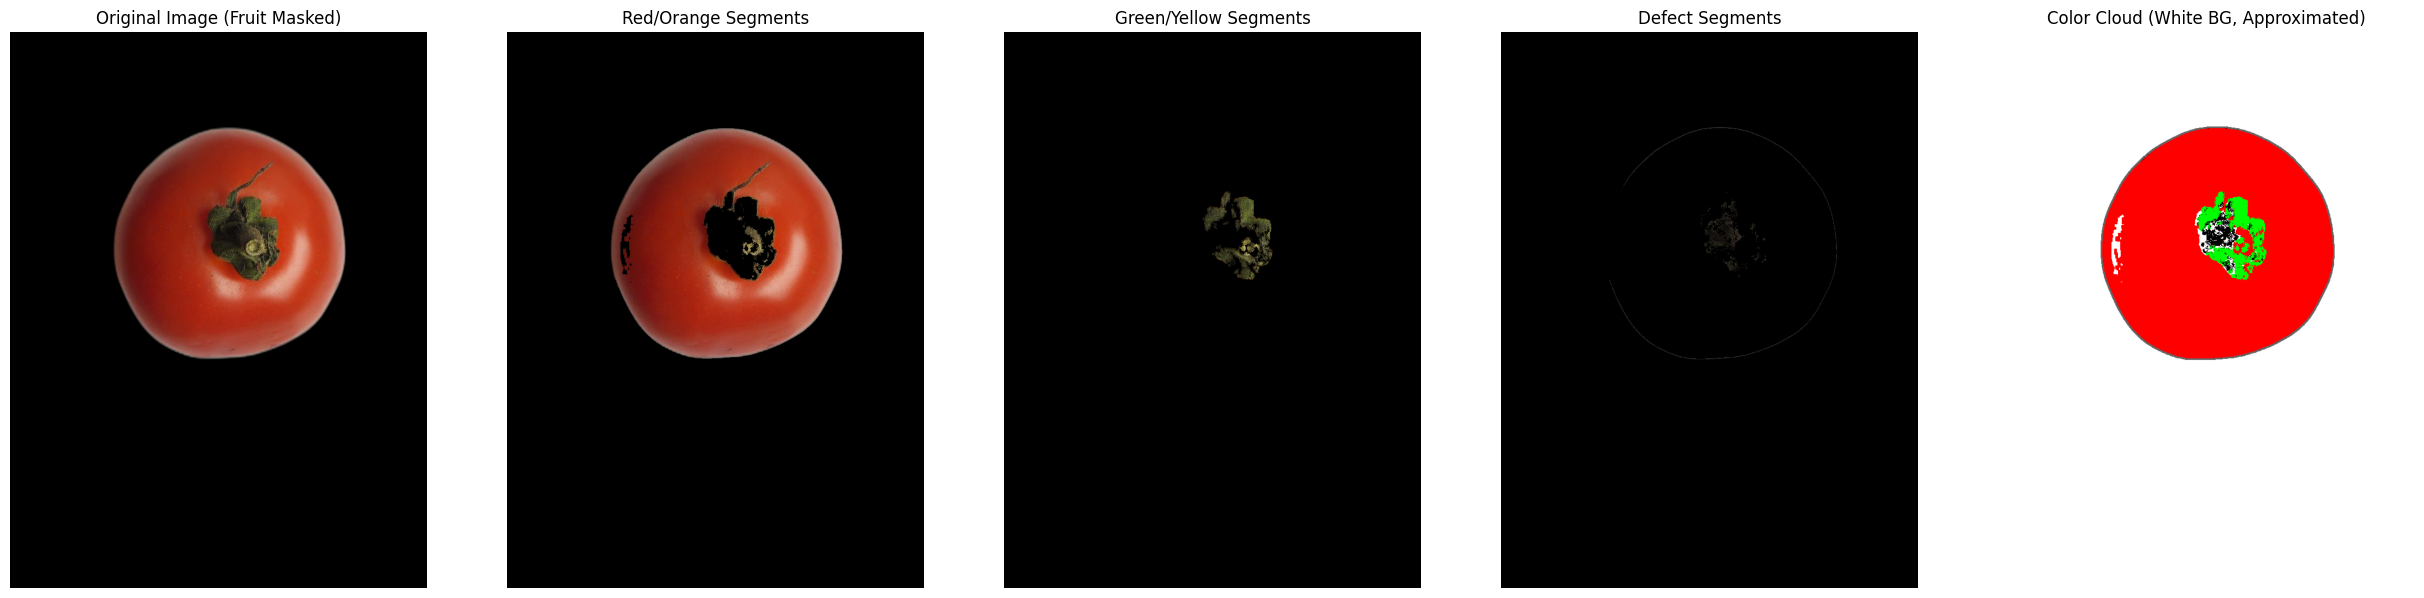

In [ ]:
input_path ="image_11.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
segment_tomato_colors_with_region_approximation(output_image)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern # For LBP
from sklearn.cluster import KMeans # For clustering

def segment_tomato_quality_with_texture(image_path, num_clusters=4):
    """
    Segments a tomato image into regions based on combined HSV color and LBP texture features
    using K-Means clustering, aiming to differentiate 'good' from 'bad' parts.
    The final 'Color Cloud' visualization will have a white background.
    """
    # Load the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Convert BGR to HSV and Grayscale for texture
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For better display of original

    # --- Step 1: Isolate the fruit from the black background ---
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7,7),np.uint8) # Slightly larger kernel for robust mask
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_OPEN, kernel)

    img_masked = cv2.bitwise_and(img, img, mask=fruit_mask)
    hsv_masked = cv2.bitwise_and(hsv, hsv, mask=fruit_mask)
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)


    # --- Step 2: Extract Texture Features (LBP) ---
    P = 8 # Number of points
    R = 1 # Radius
    lbp_image = local_binary_pattern(gray_masked, P, R, method='uniform')
    # Normalize LBP image to 0-255 for consistency with color channels
    lbp_normalized = cv2.normalize(lbp_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


    # --- Step 3: Prepare Feature Vectors for K-Means Clustering ---
    # We'll cluster pixels within the fruit mask only.
    # Each pixel will have [H, S, V, LBP] as its features.

    # Get the coordinates of the fruit pixels
    fruit_pixels_coords = np.where(fruit_mask > 0)
    num_fruit_pixels = len(fruit_pixels_coords[0])

    # Extract HSV values for fruit pixels
    h_values = hsv_masked[fruit_pixels_coords[0], fruit_pixels_coords[1], 0]
    s_values = hsv_masked[fruit_pixels_coords[0], fruit_pixels_coords[1], 1]
    v_values = hsv_masked[fruit_pixels_coords[0], fruit_pixels_coords[1], 2]

    # Extract LBP values for fruit pixels
    lbp_values = lbp_normalized[fruit_pixels_coords[0], fruit_pixels_coords[1]]

    # Create the feature matrix: N_pixels x N_features
    # Scale features if necessary. LBP is 0-255, HSV channels are also often 0-255
    # H (hue) 0-179 in OpenCV, S,V 0-255. Let's scale H to 0-255 for better balance.
    h_scaled = (h_values / 179.0 * 255.0).astype(np.uint8)

    features = np.column_stack((h_scaled, s_values, v_values, lbp_values))

    # Convert to float32 as K-Means often prefers it
    features = np.float32(features)

    # --- Step 4: Apply K-Means Clustering ---
    # Criteria: (type, max_iter, epsilon)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    attempts = 10 # Number of times algorithm is executed with different initial centroids

    # Apply K-Means
    # compactnes (sum of squared distance from each point to its corresponding center),
    # labels (cluster index for each sample),
    # centers (centers of the clusters)
    compactness, labels, centers = cv2.kmeans(features, num_clusters, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

    # Reshape labels back into an image form
    segmented_labels_image = np.zeros(gray.shape, dtype=np.uint8) # Full image size, initially black
    segmented_labels_image[fruit_pixels_coords[0], fruit_pixels_coords[1]] = labels.flatten() + 1 # +1 to make labels 1 to num_clusters

    # Create masks for each cluster
    cluster_masks = []
    for i in range(num_clusters):
        mask = np.zeros_like(fruit_mask)
        mask[segmented_labels_image == (i + 1)] = 255
        cluster_masks.append(mask)

    # --- Step 5: Interpretation and Visualization of Clusters ---
    # Assign specific colors to clusters based on their average properties (centers)
    # You will need to inspect `centers` array to manually decide which cluster is 'red', 'green', 'defect', 'undefined'
    # The order of clusters (0, 1, 2, 3...) from K-Means is arbitrary.

    # Example interpretation (you'll need to adjust this based on your output `centers`):
    # Cluster 0 might be green/yellowish (high H, good S, good V, low LBP)
    # Cluster 1 might be red/orange (low H, good S, good V, low LBP)
    # Cluster 2 might be defect (low V, low S, high LBP)
    # Cluster 3 might be another specific healthy part or edge region (medium V, medium S, medium LBP)

    # Placeholder for mapping cluster IDs to desired colors/meanings
    # Define colors for visualization (BGR format)
    color_map = {
        # These are arbitrary - you'll adjust them after seeing the `centers` output
        0: [0, 255, 0],   # Bright Green (e.g., for main healthy body)
        1: [0, 0, 255],   # Bright Red (e.g., for top red part)
        2: [0, 0, 0],     # Black (e.g., for defect)
        3: [255, 0, 255]  # Magenta (e.g., for a different healthy part or unclassified)
    }

    print("\nK-Means Cluster Centers (Scaled H, S, V, LBP):")
    for i, center in enumerate(centers):
        print(f"Cluster {i}: {center}")
    print("\nInterpret these centers to decide which cluster ID (0,1,...) corresponds to 'Good Red', 'Good Green', 'Bad/Defect'.")
    print("Then adjust the 'color_map' above accordingly.")


    # Create the final "Color Cloud" image with white background
    cloud_image = np.full(img.shape, 255, dtype=np.uint8) # White background

    # Apply colors based on assigned cluster labels within the fruit mask
    for i in range(num_clusters):
        cloud_image[segmented_labels_image == (i + 1)] = color_map.get(i, [128, 128, 128]) # Default to gray if not mapped

    # Ensure background is white and outline fruit boundary
    background_mask = cv2.bitwise_not(fruit_mask)
    cloud_image = cv2.bitwise_or(cloud_image, cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR))

    contours, _ = cv2.findContours(fruit_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(cloud_image, [largest_contour], -1, (100, 100, 100), 2) # Grey outline


    # --- Display results ---
    fig, axes = plt.subplots(1, num_clusters + 3, figsize=(30, 6)) # num_clusters + Original + LBP + Combined

    axes[0].imshow(rgb) # Original RGB image for reference
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(lbp_normalized, cmap='gray')
    axes[1].set_title('LBP Texture Image')
    axes[1].axis('off')

    # Display each cluster mask
    for i, mask in enumerate(cluster_masks):
        masked_segment = cv2.bitwise_and(img_masked, img_masked, mask=mask)
        axes[i + 2].imshow(cv2.cvtColor(masked_segment, cv2.COLOR_BGR2RGB))
        axes[i + 2].set_title(f'Cluster {i} Segment')
        axes[i + 2].axis('off')

    axes[num_clusters + 2].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[num_clusters + 2].set_title('K-Means Color Cloud')
    axes[num_clusters + 2].axis('off')

    plt.tight_layout()
    plt.show()

# --- Usage Example ---
#image_file = 'Unknown.png' # Path to your uploaded image

# Try different numbers of clusters
#(image_file, num_clusters=4)
# You might try num_clusters=3, 5, etc., to see what gives the best separation.


K-Means Cluster Centers (Scaled H, S, V, LBP):
Cluster 0: [  7.161833 207.08601  150.53804  221.95802 ]
Cluster 1: [  5.9923344 207.14307   164.16234   116.82965  ]
Cluster 2: [ 26.873888  94.31204   60.43974  131.61652 ]
Cluster 3: [  8.803024 122.93616  175.30432  103.66038 ]

Interpret these centers to decide which cluster ID (0,1,...) corresponds to 'Good Red', 'Good Green', 'Bad/Defect'.
Then adjust the 'color_map' above accordingly.


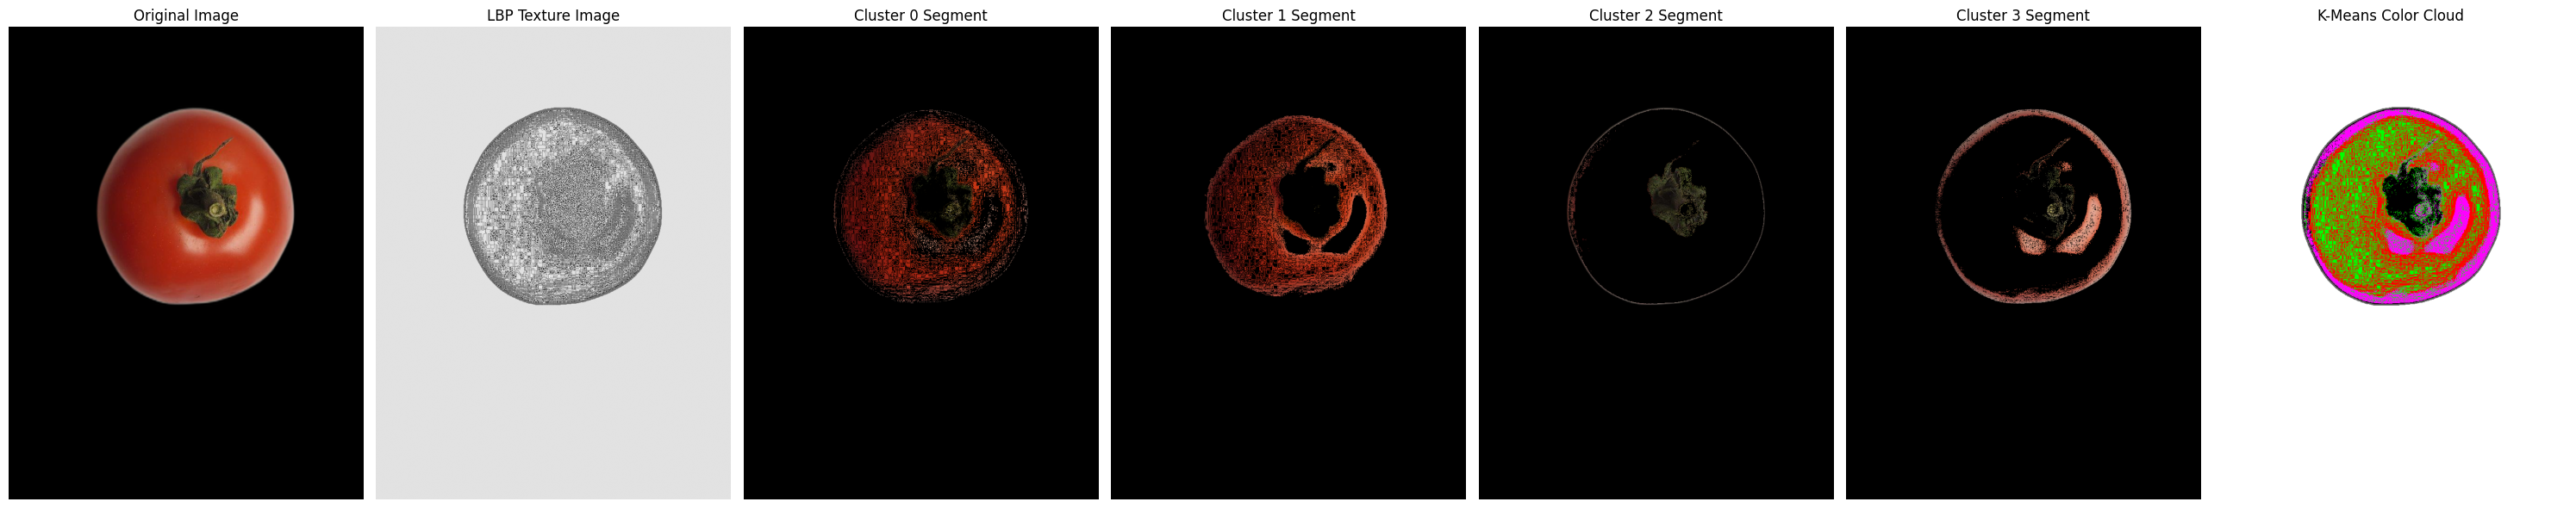

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import argparse
from typing import Dict, List, Tuple, Any

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, Tuple[int, int]]:
    """
    Creates a standardized feature vector from the image using HSV and LBP.

    Args:
        image (np.ndarray): The input BGR image.

    Returns:
        Tuple containing:
        - np.ndarray: The scaled feature vector for clustering.
        - np.ndarray: The mask of the fruit area.
        - np.ndarray: Coordinates of the fruit pixels.
        - np.ndarray: The normalized LBP image for visualization.
    """
    # Convert to HSV and Grayscale
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # --- 1. Isolate the fruit from the black background ---
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)

    # --- 2. Extract Texture (LBP) and Color (HSV) features ---
    # Apply LBP only on the masked gray image
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')

    # Get pixel coordinates within the mask
    coords = np.where(fruit_mask > 0)

    # Extract features for only the fruit pixels
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)

    # --- 3. Combine and Scale Features ---
    # Feature vector: [H, S, V, LBP]
    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)

    # Standardize features (mean=0, variance=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return scaled_features, fruit_mask, coords, lbp_normalized, scaler

def interpret_clusters(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, List[int]]]:
    """
    Automatically interprets cluster centers to label them.

    Args:
        centers (np.ndarray): The cluster centers from K-Means.
        scaler (StandardScaler): The scaler used to standardize features.

    Returns:
        A tuple containing:
        - A dictionary mapping cluster index to a label (e.g., {0: 'Ripe'}).
        - A dictionary mapping labels to BGR colors for visualization.
    """
    # Inverse transform the centers to get them in their original scale [H, S, V, LBP]
    original_centers = scaler.inverse_transform(centers)

    interpretation = {}

    # --- Define Heuristics for Interpretation ---
    # Defect/Rot: low Value (dark), low Saturation (dull)
    # Ripe Red: low Hue (0-15), high Saturation/Value
    # Unripe/Stem: Hue in green range (approx. 40-80 in OpenCV)

    # Find the 'Defect' cluster (likely lowest brightness/Value)
    defect_candidate_idx = np.argmin(original_centers[:, 2]) # Index 2 is Value
    interpretation[defect_candidate_idx] = 'Defect'

    remaining_indices = [i for i in range(len(centers)) if i != defect_candidate_idx]

    # Find the 'Ripe' cluster (likely lowest Hue among remaining)
    if remaining_indices:
        ripe_candidate_idx = remaining_indices[np.argmin(original_centers[remaining_indices, 0])] # Index 0 is Hue
        interpretation[ripe_candidate_idx] = 'Ripe'
        remaining_indices.remove(ripe_candidate_idx)

    # Find the 'Unripe/Stem' cluster (Hue is green-ish)
    if remaining_indices:
        # Check for hue in the green range (approx 30-90)
        green_candidates = [i for i in remaining_indices if 30 < original_centers[i, 0] < 90]
        if green_candidates:
            # Pick the one with the highest green-ness (closest to 60)
            unripe_idx = green_candidates[np.argmin(np.abs(original_centers[green_candidates, 0] - 60))]
            interpretation[unripe_idx] = 'Unripe/Stem'
            remaining_indices.remove(unripe_idx)

    # Assign 'Other' to any remaining clusters
    for idx in remaining_indices:
        interpretation[idx] = 'Other'

    # Define a consistent color map for visualization
    color_map_bgr = {
        'Ripe': [0, 0, 255],        # Red
        'Unripe/Stem': [0, 255, 0],  # Green
        'Defect': [255, 0, 255],     # Magenta
        'Other': [255, 255, 0]       # Cyan
    }

    print("\n--- Automated Cluster Interpretation ---")
    for i, center in enumerate(original_centers):
        label = interpretation.get(i, "Unassigned")
        print(f"Cluster {i} -> {label:<12} | Center (H,S,V,LBP): [{center[0]:.1f}, {center[1]:.1f}, {center[2]:.1f}, {center[3]:.1f}]")

    return interpretation, color_map_bgr

def visualize_segmentation(original_img: np.ndarray, lbp_img: np.ndarray, labels: np.ndarray, fruit_mask: np.ndarray,
                           coords: Tuple[np.ndarray, np.ndarray], interpretation: Dict[int, str],
                           color_map_bgr: Dict[str, List[int]]):
    """
    Displays the original image, LBP, individual segments, and final color cloud.
    """
    num_clusters = len(interpretation)

    # Create the final "Color Cloud" image with a white background
    cloud_image = np.full(original_img.shape, 255, dtype=np.uint8)

    # Create a labeled image from the flattened labels
    labeled_img = np.zeros(original_img.shape[:2], dtype=np.uint8)
    labeled_img[coords] = labels + 1 # Use labels 1 to N

    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128]) # Default to gray
        cloud_image[labeled_img == (i + 1)] = color

    # --- Display results ---
    fig, axes = plt.subplots(1, num_clusters + 3, figsize=(24, 5))
    plt.suptitle('Tomato Quality Segmentation using Color & Texture', fontsize=16)

    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')

    axes[1].imshow(lbp_img, cmap='gray')
    axes[1].set_title('LBP Texture')

    # Display each cluster segment individually
    for i in range(num_clusters):
        mask = np.uint8(labeled_img == (i + 1)) * 255
        segment = cv2.bitwise_and(original_img, original_img, mask=mask)
        axes[i + 2].imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
        axes[i + 2].set_title(f'Segment: {interpretation.get(i, "")}')

    axes[num_clusters + 2].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[num_clusters + 2].set_title('Final Segmentation')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def main(image_path: str, num_clusters: int):
    """Main function to run the segmentation process."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # 1. Create feature vector
    scaled_features, fruit_mask, coords, lbp_img, scaler = create_feature_vector(img)

    # 2. Apply K-Means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # 3. Interpret the clusters automatically
    interpretation, color_map_bgr = interpret_clusters(centers, scaler)

    # 4. Visualize the results
    visualize_segmentation(img, lbp_img, labels, fruit_mask, coords, interpretation, color_map_bgr)


usage: colab_kernel_launcher.py [-h] [-n NUM_CLUSTERS] image_path
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:

parser = argparse.ArgumentParser(description="Segment a tomato image to assess quality.")
parser.add_argument(input_path, type=str, help="Path to the input tomato image.")
parser.add_argument("-n", "--num_clusters", type=int, default=4, help="Number of clusters for K-Means.")

args = parser.parse_args()

main(args.image_path, args.num_clusters)

usage: colab_kernel_launcher.py [-h] [-n NUM_CLUSTERS] image_11.jpg
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2


--- Automated Cluster Interpretation ---
Cluster 0 -> Other        | Center (H,S,V,LBP): [27.7, 14.3, 185.7, 4.7]
Cluster 1 -> Ripe         | Center (H,S,V,LBP): [4.7, 195.0, 171.8, 5.5]
Cluster 2 -> Other        | Center (H,S,V,LBP): [29.6, 11.1, 191.7, 8.0]
Cluster 3 -> Defect       | Center (H,S,V,LBP): [11.6, 117.5, 90.9, 5.4]


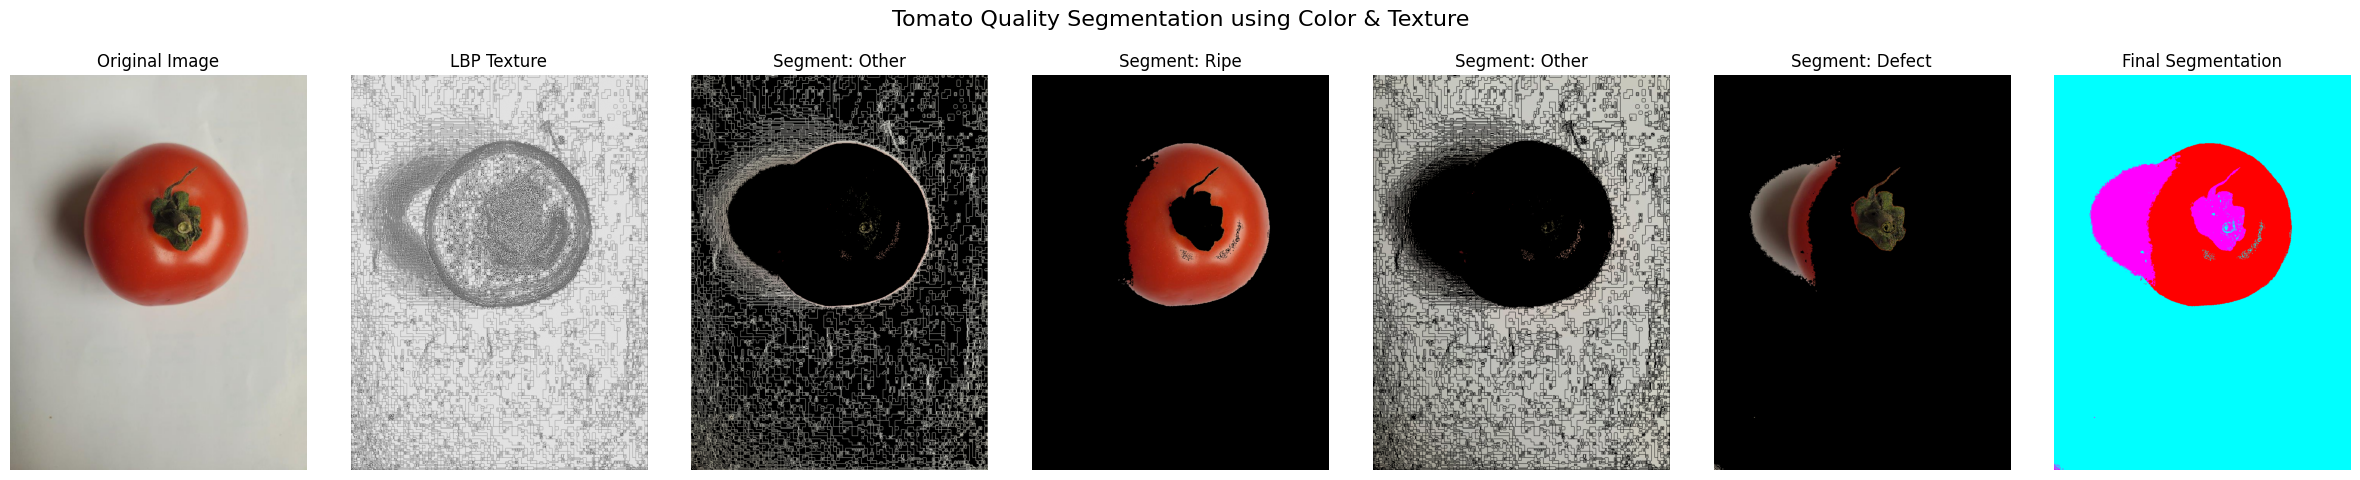

In [ ]:
# Step 1: Install scikit-image if it's not already in the environment

# Step 2: Import all necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from typing import Dict, List, Tuple

# This is needed to display images properly in Colab
from google.colab.patches import cv2_imshow

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """
    Creates a standardized feature vector from the image using HSV and LBP.
    """
    # Convert to HSV and Grayscale
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Isolate the fruit from the black background
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)

    # Extract Texture (LBP) and Color (HSV) features
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')

    coords = np.where(fruit_mask > 0)
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)

    # Combine and Scale Features
    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return scaled_features, fruit_mask, coords, lbp_normalized, scaler

def interpret_clusters(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, List[int]]]:
    """
    Automatically interprets cluster centers to label them.
    """
    original_centers = scaler.inverse_transform(centers)
    interpretation = {}

    # Heuristics for Interpretation:
    # Defect/Rot: low Value (dark)
    # Ripe Red: low Hue (0-15)
    # Unripe/Stem: Hue in green range (approx. 40-80)

    defect_candidate_idx = np.argmin(original_centers[:, 2])
    interpretation[defect_candidate_idx] = 'Defect'

    remaining_indices = [i for i in range(len(centers)) if i != defect_candidate_idx]

    if remaining_indices:
        ripe_candidate_idx = remaining_indices[np.argmin(original_centers[remaining_indices, 0])]
        interpretation[ripe_candidate_idx] = 'Ripe'
        remaining_indices.remove(ripe_candidate_idx)

    if remaining_indices:
        green_candidates = [i for i in remaining_indices if 30 < original_centers[i, 0] < 90]
        if green_candidates:
            unripe_idx = green_candidates[np.argmin(np.abs(original_centers[green_candidates, 0] - 60))]
            interpretation[unripe_idx] = 'Unripe/Stem'
            remaining_indices.remove(unripe_idx)

    for idx in remaining_indices:
        interpretation[idx] = 'Other'

    color_map_bgr = {
        'Ripe': [0, 0, 255], 'Unripe/Stem': [0, 255, 0],
        'Defect': [255, 0, 255], 'Other': [255, 255, 0]
    }

    print("\n--- Automated Cluster Interpretation ---")
    for i, center in enumerate(original_centers):
        label = interpretation.get(i, "Unassigned")
        print(f"Cluster {i} -> {label:<12} | Center (H,S,V,LBP): [{center[0]:.1f}, {center[1]:.1f}, {center[2]:.1f}, {center[3]:.1f}]")

    return interpretation, color_map_bgr

def visualize_segmentation(original_img: np.ndarray, lbp_img: np.ndarray, labels: np.ndarray, fruit_mask: np.ndarray,
                           coords: Tuple[np.ndarray, np.ndarray], interpretation: Dict[int, str],
                           color_map_bgr: Dict[str, List[int]]):
    """
    Displays the final segmentation results using matplotlib.
    """
    num_clusters = len(interpretation)

    cloud_image = np.full(original_img.shape, 255, dtype=np.uint8)
    labeled_img = np.zeros(original_img.shape[:2], dtype=np.uint8)
    labeled_img[coords] = labels + 1

    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128])
        cloud_image[labeled_img == (i + 1)] = color

    fig, axes = plt.subplots(1, num_clusters + 3, figsize=(24, 5))
    plt.suptitle('Tomato Quality Segmentation using Color & Texture', fontsize=16)

    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')

    axes[1].imshow(lbp_img, cmap='gray')
    axes[1].set_title('LBP Texture')

    for i in range(num_clusters):
        mask = np.uint8(labeled_img == (i + 1)) * 255
        segment = cv2.bitwise_and(original_img, original_img, mask=mask)
        axes[i + 2].imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
        axes[i + 2].set_title(f'Segment: {interpretation.get(i, "")}')

    axes[num_clusters + 2].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[num_clusters + 2].set_title('Final Segmentation')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def main(image_path: str, num_clusters: int):
    """Main function to run the segmentation process."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        # In Colab, we can use cv2_imshow for a quick check if an image failed to load
        # For example, if you try to load a blank image it might show a black box
        return

    # 1. Create feature vector
    scaled_features, fruit_mask, coords, lbp_img, scaler = create_feature_vector(img)

    # 2. Apply K-Means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # 3. Interpret the clusters automatically
    interpretation, color_map_bgr = interpret_clusters(centers, scaler)

    # 4. Visualize the results
    visualize_segmentation(img, lbp_img, labels, fruit_mask, coords, interpretation, color_map_bgr)

#################################################################
#                 CONFIGURATION & EXECUTION                     #
#################################################################

# 1. Set the path to your uploaded image
#    IMPORTANT: Change this string to your file's name.



--- Automated Cluster Interpretation ---
Cluster 0 -> Other        | Center (H,S,V,LBP): [4.5, 206.4, 163.6, 4.0]
Cluster 1 -> Defect       | Center (H,S,V,LBP): [23.2, 104.0, 59.4, 4.9]
Cluster 2 -> Other        | Center (H,S,V,LBP): [5.7, 120.2, 173.8, 4.2]
Cluster 3 -> Ripe         | Center (H,S,V,LBP): [4.1, 213.1, 153.4, 7.8]


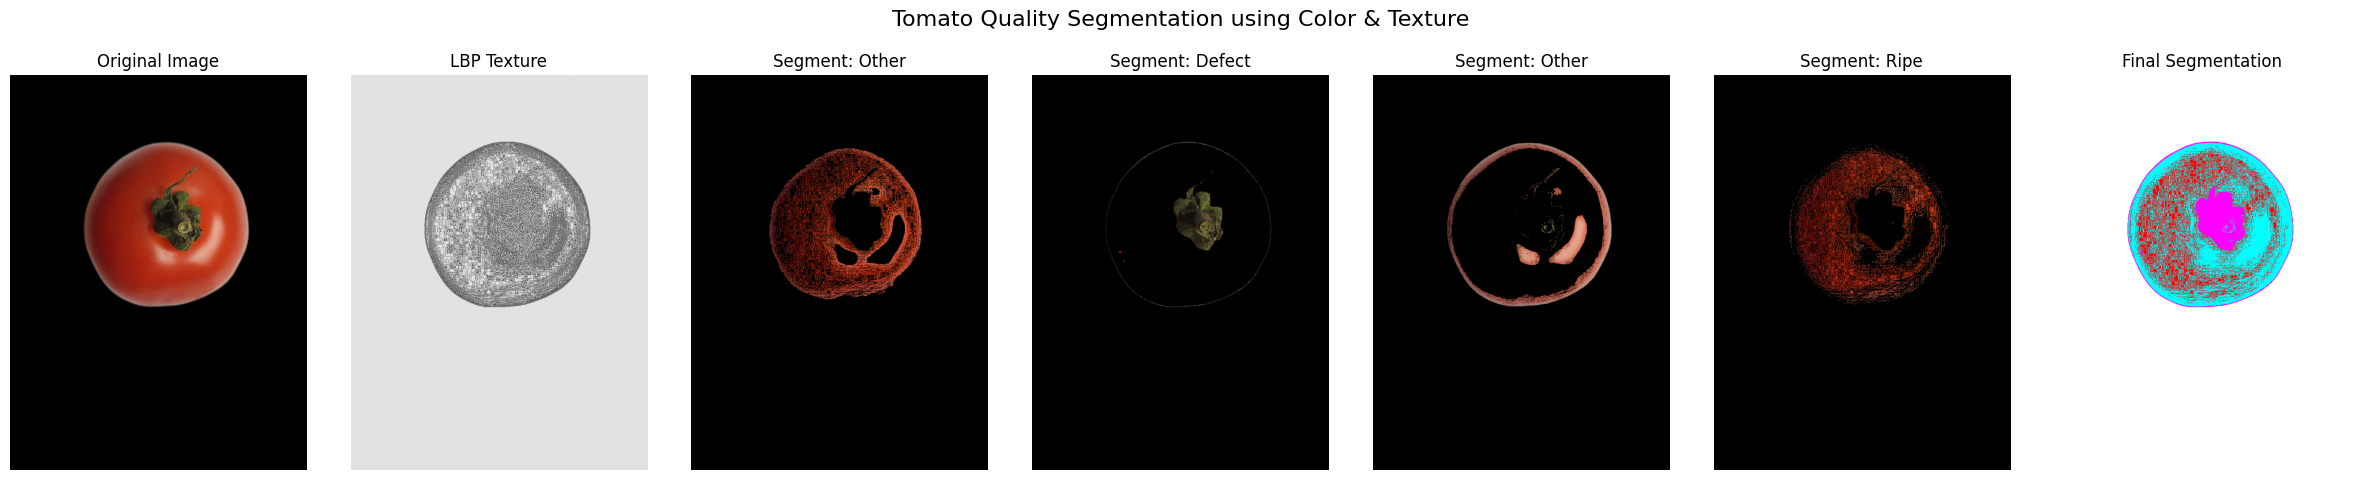

In [ ]:
input_path ="image_11.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
num_clusters = 4
main(output_image, num_clusters)

In [ ]:
# Step 1: Install scikit-image if it's not already in the environment
!pip install scikit-image -q

# Step 2: Import all necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from typing import Dict, List, Tuple
from collections import defaultdict

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """Creates a standardized feature vector from the image using HSV and LBP."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')
    coords = np.where(fruit_mask > 0)
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)
    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return scaled_features, fruit_mask, coords, lbp_normalized, scaler

def interpret_clusters_robust(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, List[int]]]:
    """
    Robustly interprets cluster centers using a rule-based system with precedence.
    This allows multiple clusters to be assigned to the same category.
    """
    original_centers = scaler.inverse_transform(centers)
    interpretation = {}
    assigned_clusters = set()

    # --- Define Rules with Precedence (Defect > Unripe > Ripe) ---

    # Rule 1: DEFECTS (Highest Priority)
    # Defects are typically very dark (low Value) or desaturated/gray (low Saturation).
    for i, center in enumerate(original_centers):
        h, s, v, lbp = center
        if v < 75 or s < 60:
            interpretation[i] = 'Defect'
            assigned_clusters.add(i)

    # Rule 2: UNRIPE/STEM
    # Unripe or stem parts are typically in the green/yellow hue range.
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if 30 < h < 90:
            interpretation[i] = 'Unripe/Stem'
            assigned_clusters.add(i)

    # Rule 3: RIPE
    # Ripe parts are in the red hue range with good saturation.
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        # Red hue is at the beginning (0-20) and end (160-179) of the spectrum
        if (h < 20 or h > 160) and s > 80:
            interpretation[i] = 'Ripe'
            assigned_clusters.add(i)

    # Rule 4: OTHER
    # Anything that doesn't fit the rules above.
    for i in range(len(original_centers)):
        if i not in assigned_clusters:
            interpretation[i] = 'Other'

    # Consistent color map for visualization
    color_map_bgr = {
        'Ripe': [0, 0, 255], 'Unripe/Stem': [0, 255, 0],
        'Defect': [255, 0, 255], 'Other': [0, 255, 255] # Changed to Cyan
    }

    print("\n--- Automated Cluster Interpretation ---")
    for i, center in enumerate(original_centers):
        label = interpretation.get(i, "Unassigned")
        print(f"Cluster {i} -> {label:<12} | Center (H,S,V,LBP): [{center[0]:.1f}, {center[1]:.1f}, {center[2]:.1f}, {center[3]:.1f}]")

    return interpretation, color_map_bgr

def visualize_and_analyze(original_img, lbp_img, labels, fruit_mask, coords, interpretation, color_map_bgr):
    """Visualizes segmentation and prints a quantitative analysis."""
    num_clusters = len(interpretation)

    # Create the final "Color Cloud" image
    cloud_image = np.full(original_img.shape, 255, dtype=np.uint8)
    labeled_img = np.zeros(original_img.shape[:2], dtype=np.uint8)
    labeled_img[coords] = labels + 1

    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128])
        cloud_image[labeled_img == (i + 1)] = color

    # --- Quantitative Analysis ---
    total_pixels = len(labels)
    summary_counts = defaultdict(int)
    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        count = np.sum(labels == i)
        summary_counts[label_name] += count

    print("\n--- Quantitative Analysis ---")
    print(f"{'Category':<15} | {'Percentage':<12} | {'Pixel Count':<10}")
    print("-" * 45)
    sorted_summary = sorted(summary_counts.items(), key=lambda item: item[1], reverse=True)
    for label_name, count in sorted_summary:
        percentage = (count / total_pixels) * 100
        print(f"{label_name:<15} | {percentage:>10.2f}% | {count:<10}")
    print("-" * 45)

    # --- Display results ---
    fig, axes = plt.subplots(1, num_clusters + 3, figsize=(24, 5))
    plt.suptitle('Tomato Quality Segmentation using Color & Texture', fontsize=16)
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(lbp_img, cmap='gray')
    axes[1].set_title('LBP Texture')

    for i in range(num_clusters):
        mask = np.uint8(labeled_img == (i + 1)) * 255
        segment = cv2.bitwise_and(original_img, original_img, mask=mask)
        axes[i + 2].imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
        axes[i + 2].set_title(f'Segment: {interpretation.get(i, "")}')

    axes[num_clusters + 2].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[num_clusters + 2].set_title('Final Segmentation')

    for ax in axes: ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def main(image_path: str, num_clusters: int):
    """Main function to run the segmentation process."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    scaled_features, fruit_mask, coords, lbp_img, scaler = create_feature_vector(img)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10).fit(scaled_features)
    interpretation, color_map_bgr = interpret_clusters_robust(kmeans.cluster_centers_, scaler)
    visualize_and_analyze(img, lbp_img, kmeans.labels_, fruit_mask, coords, interpretation, color_map_bgr)

#################################################################
#                 CONFIGURATION & EXECUTION                     #
#################################################################

# 1. Set the path to your uploaded image
#    IMPORTANT: Change this string to your file's name.
#image_path = 'Unknown.jpg' # Use 'Unknown.jpg' or 'Unknown-1.jpg'

# 2. Set the number of clusters to find (4 or 5 is often good)
#num_clusters = 5

# 3. Run the main function
#main(image_path, num_clusters)


--- Automated Cluster Interpretation ---
Cluster 0 -> Ripe         | Center (H,S,V,LBP): [5.4, 160.3, 118.0, 2.5]
Cluster 1 -> Ripe         | Center (H,S,V,LBP): [4.8, 192.7, 106.8, 7.4]
Cluster 2 -> Ripe         | Center (H,S,V,LBP): [7.6, 228.3, 182.0, 2.8]
Cluster 3 -> Other        | Center (H,S,V,LBP): [18.2, 76.0, 89.9, 4.7]
Cluster 4 -> Ripe         | Center (H,S,V,LBP): [7.3, 233.1, 176.9, 7.8]

--- Quantitative Analysis ---
Category        | Percentage   | Pixel Count
---------------------------------------------
Ripe            |      87.96% | 649949    
Other           |      12.04% | 88986     
---------------------------------------------


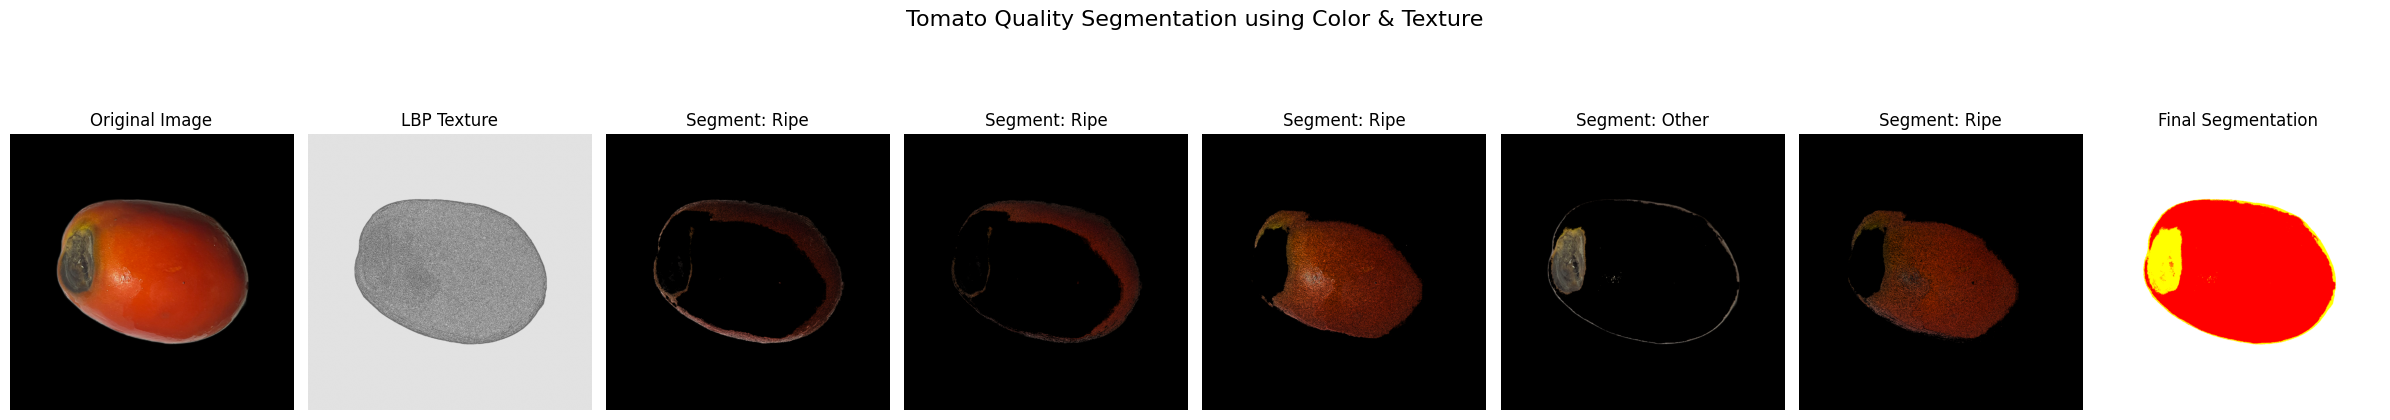

In [ ]:
input_path ="image_15.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
num_clusters = 5
main(output_image, num_clusters)

In [ ]:
# Step 1: Install scikit-image if it's not already in the environment

# Step 2: Import all necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from typing import Dict, List, Tuple
from collections import defaultdict

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """Creates a standardized feature vector from the image using HSV and LBP."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')
    coords = np.where(fruit_mask > 0)
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)
    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return scaled_features, fruit_mask, coords, lbp_normalized, scaler

def interpret_clusters_robust(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, List[int]]]:
    """Robustly interprets cluster centers using a rule-based system with precedence."""
    original_centers = scaler.inverse_transform(centers)
    interpretation = {}
    assigned_clusters = set()
    for i, center in enumerate(original_centers):
        h, s, v, lbp = center
        if v < 75 or s < 60:
            interpretation[i] = 'Defect'
            assigned_clusters.add(i)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if 30 < h < 90:
            interpretation[i] = 'Unripe/Stem'
            assigned_clusters.add(i)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if (h < 20 or h > 160) and s > 80:
            interpretation[i] = 'Ripe'
            assigned_clusters.add(i)
    for i in range(len(original_centers)):
        if i not in assigned_clusters:
            interpretation[i] = 'Other'
    color_map_bgr = {'Ripe': [0, 0, 255], 'Unripe/Stem': [0, 255, 0], 'Defect': [255, 0, 255], 'Other': [0, 255, 255]}
    print("\n--- Initial Cluster Interpretation ---")
    for i, center in enumerate(original_centers):
        label = interpretation.get(i, "Unassigned")
        print(f"Cluster {i} -> {label:<12} | Center (H,S,V,LBP): [{center[0]:.1f}, {center[1]:.1f}, {center[2]:.1f}, {center[3]:.1f}]")
    return interpretation, color_map_bgr

# --- NEW PRO FEATURE 1: DEFECT REFINEMENT ---
def refine_defects(labeled_img: np.ndarray, hsv_img: np.ndarray, interpretation: Dict[int, str]) -> np.ndarray:
    """
    Performs a second pass to find dark spots within 'Ripe' areas and re-label them as 'Defect'.
    """
    refined_labels = labeled_img.copy()
    h, s, v = cv2.split(hsv_img)

    # Get the cluster indices that were labeled 'Ripe'
    ripe_indices = [k for k, val in interpretation.items() if val == 'Ripe']
    if not ripe_indices:
        return refined_labels # No ripe clusters to refine

    # Create a mask for all 'Ripe' areas
    ripe_mask = np.zeros_like(labeled_img, dtype=bool)
    for index in ripe_indices:
        ripe_mask = ripe_mask | (labeled_img == (index + 1))

    # Within the ripe mask, find pixels that are too dark (low Value)
    # This threshold is key for catching subtle bruises or rot.
    defect_threshold = 60
    dark_spots_mask = (v < defect_threshold) & ripe_mask

    # Re-label these dark spots as 'Defect'. We need a cluster index for 'Defect'.
    # We'll just use the first available defect index. If none, we can't re-label.
    defect_indices = [k for k, val in interpretation.items() if val == 'Defect']
    if defect_indices:
        refined_labels[dark_spots_mask] = defect_indices[0] + 1
        print(f"\nRefinement complete: Found and re-labeled {np.sum(dark_spots_mask)} pixels as defects.")

    return refined_labels

# --- NEW PRO FEATURE 2: QUALITY REPORT CARD ---
def generate_quality_report(labels: np.ndarray, interpretation: Dict[int, str]):
    """Generates a final quality report card based on the segmentation."""
    total_pixels = len(labels)
    summary_counts = defaultdict(int)
    for i in range(len(interpretation)):
        label_name = interpretation.get(i, "Other")
        count = np.sum(labels == i)
        summary_counts[label_name] += count

    ripe_percent = (summary_counts['Ripe'] / total_pixels) * 100
    defect_percent = (summary_counts['Defect'] / total_pixels) * 100

    # Simple scoring logic: Penalize heavily for defects
    quality_score = ripe_percent - (defect_percent * 2.5)

    grade = "N/A"
    if quality_score >= 90: grade = "A: Excellent"
    elif quality_score >= 75: grade = "B: Good"
    elif quality_score >= 50: grade = "C: Fair"
    else: grade = "D: Poor"

    print("\n" + "="*45)
    print("      🍅 TOMATO QUALITY REPORT CARD 🍅")
    print("="*45)
    print(f"{'Category':<15} | {'Percentage':<12}")
    print("-"*45)
    for label_name, count in summary_counts.items():
        percentage = (count / total_pixels) * 100
        print(f"{label_name:<15} | {percentage:>10.2f}%")
    print("-"*45)
    print(f"Calculated Quality Score: {quality_score:.2f} / 100.00")
    print(f"Final Assessment Grade:   {grade}")
    print("="*45)

def visualize_results(original_img, lbp_img, refined_labeled_img, interpretation, color_map_bgr):
    """Visualizes the final segmentation results."""
    num_clusters = len(interpretation)
    cloud_image = np.full(original_img.shape, 255, dtype=np.uint8)

    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128])
        cloud_image[refined_labeled_img == (i + 1)] = color

    fig, axes = plt.subplots(1, num_clusters + 3, figsize=(28, 5))
    plt.suptitle('Tomato Quality Segmentation [with Defect Refinement]', fontsize=16)
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)); axes[0].set_title('Original Image')
    axes[1].imshow(lbp_img, cmap='gray'); axes[1].set_title('LBP Texture')

    for i in range(num_clusters):
        mask = np.uint8(refined_labeled_img == (i + 1)) * 255
        segment = cv2.bitwise_and(original_img, original_img, mask=mask)
        axes[i + 2].imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
        axes[i + 2].set_title(f'Segment: {interpretation.get(i, "")}')

    axes[num_clusters + 2].imshow(cv2.cvtColor(cloud_image, cv2.COLOR_BGR2RGB))
    axes[num_clusters + 2].set_title('Final Segmentation')

    for ax in axes: ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()

def main(image_path: str, num_clusters: int):
    img = cv2.imread(image_path)
    if img is None: return print(f"Error: Could not load image from {image_path}")
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    scaled_features, fruit_mask, coords, lbp_img, scaler = create_feature_vector(img)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10).fit(scaled_features)

    # 1. Initial interpretation of clusters
    interpretation, color_map_bgr = interpret_clusters_robust(kmeans.cluster_centers_, scaler)

    # 2. Create initial labeled image
    initial_labeled_img = np.zeros(img.shape[:2], dtype=np.uint8)
    initial_labeled_img[coords] = kmeans.labels_ + 1

    # 3. <-- PRO FEATURE 1 --> Refine defects
    refined_labeled_img = refine_defects(initial_labeled_img, hsv_img, interpretation)

    # 4. Create refined labels vector for analysis
    refined_labels_vector = refined_labeled_img[coords] - 1

    # 5. <-- PRO FEATURE 2 --> Generate final report from refined labels
    generate_quality_report(refined_labels_vector, interpretation)

    # 6. Visualize final results
    visualize_results(img, lbp_img, refined_labeled_img, interpretation, color_map_bgr)



--- Initial Cluster Interpretation ---
Cluster 0 -> Ripe         | Center (H,S,V,LBP): [7.2, 233.2, 176.0, 7.7]
Cluster 1 -> Ripe         | Center (H,S,V,LBP): [5.3, 167.2, 121.1, 2.4]
Cluster 2 -> Other        | Center (H,S,V,LBP): [17.7, 76.2, 90.0, 4.6]
Cluster 3 -> Ripe         | Center (H,S,V,LBP): [7.7, 228.6, 183.8, 2.8]
Cluster 4 -> Ripe         | Center (H,S,V,LBP): [4.8, 191.0, 105.9, 7.4]
Cluster 5 -> Defect       | Center (H,S,V,LBP): [175.7, 49.7, 59.0, 5.4]

Refinement complete: Found and re-labeled 2383 pixels as defects.

      🍅 TOMATO QUALITY REPORT CARD 🍅
Category        | Percentage  
---------------------------------------------
Ripe            |      87.32%
Other           |      12.34%
Defect          |       0.34%
---------------------------------------------
Calculated Quality Score: 86.47 / 100.00
Final Assessment Grade:   B: Good


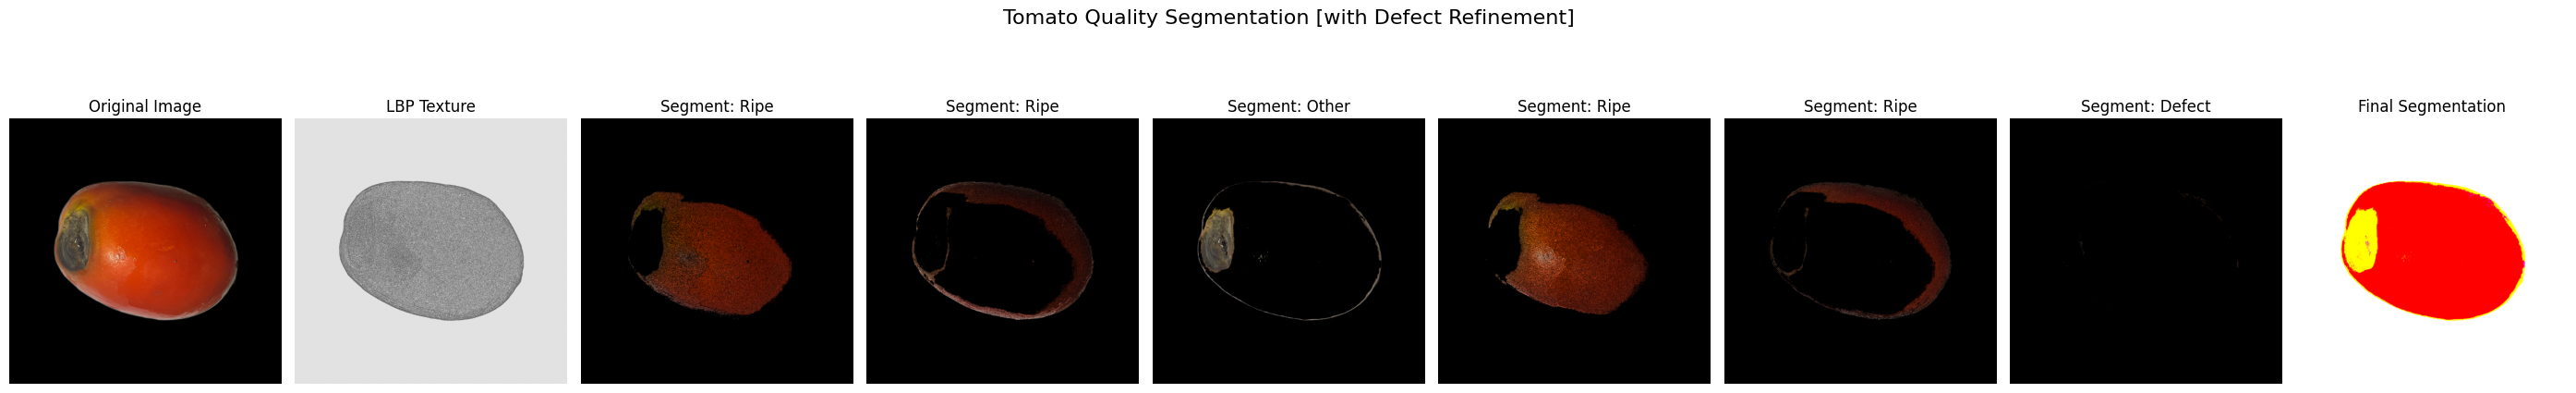

In [ ]:
input_path ="image_15.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
num_clusters = 6
main(output_image, num_clusters)

In [ ]:
# Step 1: Ensure scikit-image is installed

# Step 2: Import all necessary libraries
import cv2
import numpy as np
from rembg import remove
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from typing import Dict, Tuple
from collections import defaultdict
import requests

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """Creates a standardized feature vector from the image using HSV color and LBP texture."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, cashew_mask = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    cashew_mask = cv2.morphologyEx(cashew_mask, cv2.MORPH_CLOSE, kernel)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray_masked = cv2.bitwise_and(gray, gray, mask=cashew_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')

    coords = np.where(cashew_mask > 0)
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)

    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return scaled_features, cashew_mask, coords, lbp_normalized, scaler

def interpret_cashew_clusters_v3(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, list]]:
    """
    V3: Interprets clusters with a new 'Discolored' category for more nuance.
    Rule priority is critical: Scorched -> Healthy -> Discolored -> Testa.
    """
    original_centers = scaler.inverse_transform(centers)
    interpretation = {}
    assigned_clusters = set()

    # Rule 1: Scorched (unambiguously dark)
    for i, center in enumerate(original_centers):
        h, s, v, lbp = center
        if v < 80:
            interpretation[i] = 'Defect: Scorched'
            assigned_clusters.add(i)

    # Rule 2: Healthy Kernel (bright and not very colorful)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if s < 60 and v > 130:
            interpretation[i] = 'Healthy Kernel'
            assigned_clusters.add(i)

    # Rule 3: NEW - Discolored/Light Brown (moderately saturated, brownish hue)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if h < 30 and s > 50: # Catches the light brown/yellowish-brown spots
            interpretation[i] = 'Defect: Discolored'
            assigned_clusters.add(i)

    # Rule 4: Testa Skin (more specific rule for reddish-brown)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if (h < 20 or h > 175) and s > 70:
            interpretation[i] = 'Defect: Testa Skin'
            assigned_clusters.add(i)

    # Rule 5: Remainder
    for i in range(len(original_centers)):
        if i not in assigned_clusters:
            interpretation[i] = 'Other'

    color_map_bgr = {
        'Healthy Kernel': [0, 255, 255],      # Yellow
        'Defect: Scorched': [0, 0, 0],          # Black
        'Defect: Discolored': [0, 165, 255],    # Orange
        'Defect: Testa Skin': [42, 42, 165],   # Brown
        'Other': [255, 0, 255]                 # Magenta
    }

    print("\n--- 🥜 Cashew Cluster Interpretation (V3) ---")
    for i, center in enumerate(original_centers):
        label = interpretation.get(i, "Unassigned")
        print(f"Cluster {i} -> {label:<20} | Center (H,S,V,LBP): [{center[0]:.1f}, {center[1]:.1f}, {center[2]:.1f}, {center[3]:.1f}]")

    return interpretation, color_map_bgr

def clean_segmentation(labeled_img: np.ndarray) -> np.ndarray:
    """
    Cleans the segmentation mask using morphological operations to remove noise.
    """
    cleaned_img = labeled_img.copy()
    # Use a small kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # The 'opening' operation (erosion followed by dilation) removes small noise pixels.
    cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_OPEN, kernel, iterations=2)
    # The 'closing' operation (dilation followed by erosion) fills small holes in objects.
    cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_CLOSE, kernel, iterations=2)

    return cleaned_img

def generate_cashew_report(labels_vector: np.ndarray, interpretation: Dict[int, str]):
    """Generates an updated quality report card."""
    total_pixels = len(labels_vector)
    summary_counts = defaultdict(int)

    for i in range(len(interpretation)):
        label_name = interpretation.get(i, "Other")
        count = np.sum(labels_vector == i)
        summary_counts[label_name] += count

    # Calculate percentages for all categories
    percentages = {label: (count / total_pixels) * 100 for label, count in summary_counts.items()}
    scorched_percent = percentages.get('Defect: Scorched', 0)
    total_defect_percent = sum(p for label, p in percentages.items() if 'Defect' in label)

    grade = "N/A"
    if scorched_percent > 1.0:
        grade = "Reject (Scorched)"
    elif total_defect_percent > 20.0:
        grade = "Grade C"
    elif total_defect_percent > 5.0:
        grade = "Grade B"
    else:
        grade = "Grade A / Premium"

    print("\n" + "="*45)
    print("      🥜 CASHEW QUALITY REPORT CARD 🥜")
    print("="*45)
    print(f"{'Category':<20} | {'Percentage':<12}")
    print("-"*45)
    for label_name, percentage in sorted(percentages.items()):
        print(f"{label_name:<20} | {percentage:>10.2f}%")
    print("-"*45)
    print(f"Total Defect Percentage: {total_defect_percent:.2f}%")
    print(f"Final Assessment Grade:  {grade}")
    print("="*45)

def visualize_results(original_img, lbp_img, final_labeled_img, interpretation, color_map_bgr):
    """Visualizes the final, cleaned segmentation results."""
    num_clusters = len(interpretation)
    segmentation_overlay = np.zeros(original_img.shape, dtype=np.uint8)
    segmentation_overlay[final_labeled_img == 0] = [255, 255, 255]

    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128])
        segmentation_overlay[final_labeled_img == (i + 1)] = color

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plt.suptitle('Cashew Nut Quality Segmentation (Improved)', fontsize=16)

    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)); axes[0].set_title('Original Image')
    axes[1].imshow(lbp_img, cmap='gray'); axes[1].set_title('LBP Texture')
    axes[2].imshow(cv2.cvtColor(segmentation_overlay, cv2.COLOR_BGR2RGB)); axes[2].set_title('Final Segmentation')

    for ax in axes: ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()

def process_image(image_path: str, num_clusters: int = 4):
    """Main function to run the entire improved cashew analysis pipeline."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}"); return

    scaled_features, cashew_mask, coords, lbp_img, scaler = create_feature_vector(img)

    # Use 4 clusters for more detailed segmentation
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto').fit(scaled_features)

    # Use the V3 interpretation logic
    interpretation, color_map_bgr = interpret_cashew_clusters_v3(kmeans.cluster_centers_, scaler)

    # Create the initial "noisy" labeled image
    initial_labeled_img = np.zeros(img.shape[:2], dtype=np.uint8)
    initial_labeled_img[coords] = kmeans.labels_ + 1

    # --- NEW STEP: Clean the segmentation mask ---
    final_labeled_img = clean_segmentation(initial_labeled_img)

    final_labels_vector = final_labeled_img[coords] - 1

    generate_cashew_report(final_labels_vector, interpretation)
    visualize_results(img, lbp_img, final_labeled_img, interpretation, color_map_bgr)


In [ ]:
%cd /content/drive/MyDrive/Project/TOMATO PROJECT/Old

/content/drive/MyDrive/Project/TOMATO PROJECT/Old



--- Initial Cluster Interpretation ---
Cluster 0 -> Ripe         | Center (H,S,V,LBP): [19.3, 87.7, 200.6, 3.6]
Cluster 1 -> Defect       | Center (H,S,V,LBP): [22.1, 56.6, 231.2, 7.9]
Cluster 2 -> Ripe         | Center (H,S,V,LBP): [16.3, 125.2, 146.9, 5.1]
Cluster 3 -> Defect       | Center (H,S,V,LBP): [22.8, 47.3, 239.6, 2.8]

Refinement complete: Found and re-labeled 54 pixels as defects.

      🍅 TOMATO QUALITY REPORT CARD 🍅
Category        | Percentage  
---------------------------------------------
Ripe            |      43.32%
Defect          |      56.68%
---------------------------------------------
Calculated Quality Score: -98.38 / 100.00
Final Assessment Grade:   D: Poor


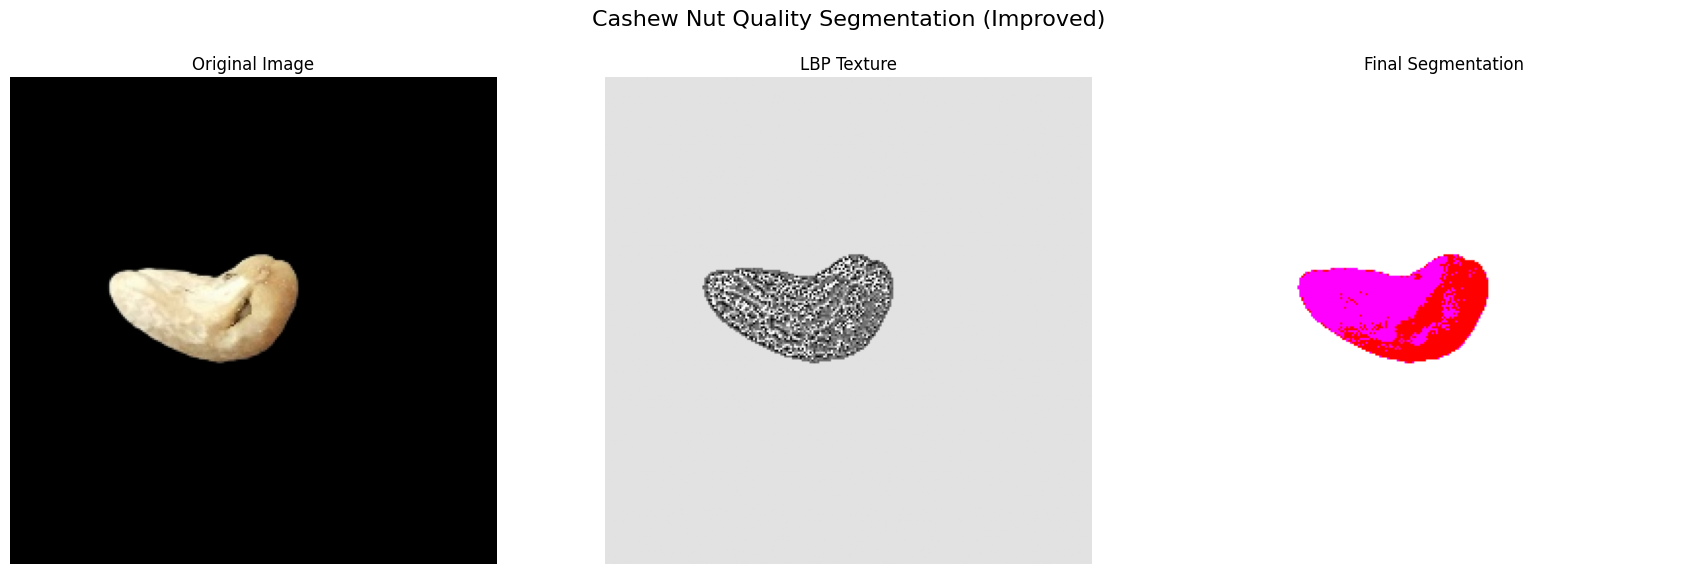

In [ ]:
input_path ="image_24.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(255, 255, 255))
num_clusters = 4
main(output_image, num_clusters)

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from PIL import Image, ImageTk
import cv2
import numpy as np
from rembg import remove
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from typing import Dict, Tuple, List
from collections import defaultdict
import threading
import io
import sys
import os

# --- Original Image Processing Logic (Refactored for GUI) ---
# I've modified the functions to return data (images, text) instead of
# directly printing or plotting them.

def remove_background_advanced(input_path, output_path, alpha_matte=False, background_color=(255, 255, 255)):
    """Removes the background from an image and saves it."""
    try:
        with open(input_path, "rb") as input_file:
            input_data = input_file.read()
            output_data = remove(input_data, alpha_matte=alpha_matte, background_color=background_color)
        with open(output_path, "wb") as output_file:
            output_file.write(output_data)
        return True
    except Exception as e:
        print(f"Error in remove_background_advanced: {e}")
        return False

def create_feature_vector(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """Creates a standardized feature vector from the image using HSV and LBP."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, fruit_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7, 7), np.uint8)
    fruit_mask = cv2.morphologyEx(fruit_mask, cv2.MORPH_CLOSE, kernel)
    gray_masked = cv2.bitwise_and(gray, gray, mask=fruit_mask)
    lbp = local_binary_pattern(gray_masked, P=8, R=1, method='uniform')
    coords = np.where(fruit_mask > 0)
    hsv_pixels = hsv[coords]
    lbp_pixels = lbp[coords].reshape(-1, 1)
    features = np.hstack((hsv_pixels, lbp_pixels)).astype(np.float32)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    lbp_normalized = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return scaled_features, fruit_mask, coords, lbp_normalized, scaler

def interpret_clusters_robust(centers: np.ndarray, scaler: StandardScaler) -> Tuple[Dict[int, str], Dict[str, List[int]]]:
    """Robustly interprets cluster centers using a rule-based system."""
    original_centers = scaler.inverse_transform(centers)
    interpretation = {}
    assigned_clusters = set()
    # Rule 1: Defects (dark or desaturated)
    for i, center in enumerate(original_centers):
        h, s, v, lbp = center
        if v < 75 or s < 60:
            interpretation[i] = 'Defect'
            assigned_clusters.add(i)
    # Rule 2: Unripe/Stem (greenish)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if 30 < h < 90:
            interpretation[i] = 'Unripe/Stem'
            assigned_clusters.add(i)
    # Rule 3: Ripe (reddish and saturated)
    for i, center in enumerate(original_centers):
        if i in assigned_clusters: continue
        h, s, v, lbp = center
        if (h < 20 or h > 160) and s > 80:
            interpretation[i] = 'Ripe'
            assigned_clusters.add(i)
    # Rule 4: Anything else
    for i in range(len(original_centers)):
        if i not in assigned_clusters:
            interpretation[i] = 'Other'
    color_map_bgr = {'Ripe': [0, 0, 255], 'Unripe/Stem': [0, 255, 0], 'Defect': [255, 0, 255], 'Other': [0, 255, 255]}
    return interpretation, color_map_bgr

def refine_defects(labeled_img: np.ndarray, hsv_img: np.ndarray, interpretation: Dict[int, str]) -> np.ndarray:
    """Performs a second pass to find dark spots within 'Ripe' areas."""
    refined_labels = labeled_img.copy()
    h, s, v = cv2.split(hsv_img)
    ripe_indices = [k for k, val in interpretation.items() if val == 'Ripe']
    if not ripe_indices: return refined_labels
    ripe_mask = np.zeros_like(labeled_img, dtype=bool)
    for index in ripe_indices:
        ripe_mask = ripe_mask | (labeled_img == (index + 1))
    defect_threshold = 60
    dark_spots_mask = (v < defect_threshold) & ripe_mask
    defect_indices = [k for k, val in interpretation.items() if val == 'Defect']
    if defect_indices:
        refined_labels[dark_spots_mask] = defect_indices[0] + 1
    return refined_labels

def generate_quality_report(labels: np.ndarray, interpretation: Dict[int, str]) -> str:
    """Generates a quality report string based on the segmentation."""
    # Redirect stdout to capture the print output
    old_stdout = sys.stdout
    sys.stdout = report_io = io.StringIO()

    total_pixels = len(labels)
    if total_pixels == 0:
        print("Could not find tomato in the image.")
        sys.stdout = old_stdout
        return report_io.getvalue()

    summary_counts = defaultdict(int)
    for i in range(len(interpretation)):
        label_name = interpretation.get(i, "Other")
        count = np.sum(labels == i)
        summary_counts[label_name] += count

    ripe_percent = (summary_counts.get('Ripe', 0) / total_pixels) * 100
    defect_percent = (summary_counts.get('Defect', 0) / total_pixels) * 100

    quality_score = ripe_percent - (defect_percent * 2.5)
    quality_score = max(0, quality_score) # Ensure score is not negative

    grade = "N/A"
    if quality_score >= 90: grade = "A: Excellent"
    elif quality_score >= 75: grade = "B: Good"
    elif quality_score >= 50: grade = "C: Fair"
    else: grade = "D: Poor"

    print("="*45)
    print("      🍅 TOMATO QUALITY REPORT CARD 🍅")
    print("="*45)
    print(f"{'Category':<15} | {'Percentage':<12}")
    print("-"*45)
    for label_name, count in summary_counts.items():
        percentage = (count / total_pixels) * 100
        print(f"{label_name:<15} | {percentage:>10.2f}%")
    print("-"*45)
    print(f"Calculated Quality Score: {quality_score:.2f} / 100.00")
    print(f"Final Assessment Grade:   {grade}")
    print("="*45)

    # Restore stdout and return the captured string
    sys.stdout = old_stdout
    return report_io.getvalue()

def create_segmentation_image(original_img, refined_labeled_img, interpretation, color_map_bgr):
    """Creates a single color-coded image of the final segmentation."""
    cloud_image = np.full(original_img.shape, 255, dtype=np.uint8)
    num_clusters = len(interpretation)
    for i in range(num_clusters):
        label_name = interpretation.get(i, "Other")
        color = color_map_bgr.get(label_name, [128, 128, 128])
        cloud_image[refined_labeled_img == (i + 1)] = color
    return cloud_image

def analysis_pipeline(image_path: str, num_clusters: int):
    """The main processing function that returns all results."""
    img = cv2.imread(image_path)
    if img is None:
        return None, None, None, f"Error: Could not load image from {image_path}"

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    scaled_features, fruit_mask, coords, lbp_img, scaler = create_feature_vector(img)

    if len(scaled_features) == 0:
        return img, None, None, "Error: No fruit detected in the image."

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10).fit(scaled_features)

    interpretation, color_map_bgr = interpret_clusters_robust(kmeans.cluster_centers_, scaler)

    initial_labeled_img = np.zeros(img.shape[:2], dtype=np.uint8)
    initial_labeled_img[coords] = kmeans.labels_ + 1

    refined_labeled_img = refine_defects(initial_labeled_img, hsv_img, interpretation)

    segmentation_image = create_segmentation_image(img, refined_labeled_img, interpretation, color_map_bgr)

    refined_labels_vector = refined_labeled_img[coords] - 1

    report_text = generate_quality_report(refined_labels_vector, interpretation)

    return img, lbp_img, segmentation_image, report_text


# --- Tkinter GUI Application ---

class TomatoAnalyzerApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Tomato Quality Analyzer")
        self.geometry("1200x800")
        self.configure(bg="#f0f0f0")

        self.input_path = None
        self.output_path = None

        # --- Main Layout Frames ---
        top_frame = tk.Frame(self, bg="#dcdcdc", padx=10, pady=10)
        top_frame.pack(fill=tk.X)

        main_frame = tk.Frame(self, bg="#f0f0f0", padx=10, pady=10)
        main_frame.pack(fill=tk.BOTH, expand=True)

        main_frame.grid_columnconfigure(0, weight=1)
        main_frame.grid_columnconfigure(1, weight=1)
        main_frame.grid_rowconfigure(1, weight=1)

        # --- Top Frame Widgets ---
        self.btn_select = ttk.Button(top_frame, text="1. Select Image", command=self.select_image)
        self.btn_select.pack(side=tk.LEFT, padx=5)

        self.lbl_path = ttk.Label(top_frame, text="No image selected", background="#dcdcdc", anchor="w")
        self.lbl_path.pack(side=tk.LEFT, fill=tk.X, expand=True, padx=5)

        self.btn_analyze = ttk.Button(top_frame, text="2. Analyze Quality", command=self.start_analysis_thread, state=tk.DISABLED)
        self.btn_analyze.pack(side=tk.RIGHT, padx=5)

        self.progress_bar = ttk.Progressbar(top_frame, orient='horizontal', mode='indeterminate')


        # --- Main Frame Widgets (Image Displays) ---
        image_frame = ttk.LabelFrame(main_frame, text="Image Analysis")
        image_frame.grid(row=0, column=0, columnspan=2, sticky="nsew", pady=10)
        image_frame.grid_columnconfigure(0, weight=1)
        image_frame.grid_columnconfigure(1, weight=1)
        image_frame.grid_columnconfigure(2, weight=1)

        self.img_label_orig = self.create_image_label(image_frame, "Original Image", 0)
        self.img_label_lbp = self.create_image_label(image_frame, "LBP Texture", 1)
        self.img_label_seg = self.create_image_label(image_frame, "Final Segmentation", 2)

        # --- Main Frame Widgets (Report) ---
        report_frame = ttk.LabelFrame(main_frame, text="Quality Report")
        report_frame.grid(row=1, column=0, columnspan=2, sticky="nsew", pady=10)
        report_frame.grid_rowconfigure(0, weight=1)
        report_frame.grid_columnconfigure(0, weight=1)

        self.report_text = tk.Text(report_frame, wrap=tk.WORD, height=10, font=("Courier", 10), state=tk.DISABLED)
        self.report_text.grid(row=0, column=0, sticky="nsew")

        scrollbar = ttk.Scrollbar(report_frame, command=self.report_text.yview)
        scrollbar.grid(row=0, column=1, sticky='ns')
        self.report_text['yscrollcommand'] = scrollbar.set

    def create_image_label(self, parent, title, col):
        """Helper to create a labeled frame for an image."""
        frame = tk.Frame(parent, bg="#ffffff", bd=2, relief=tk.SUNKEN)
        frame.grid(row=0, column=col, padx=10, pady=10, sticky="nsew")

        lbl_title = ttk.Label(frame, text=title, anchor="center")
        lbl_title.pack(pady=(5,0))

        lbl_image = tk.Label(frame, bg="#ffffff")
        lbl_image.pack(padx=5, pady=5, fill=tk.BOTH, expand=True)
        return lbl_image

    def select_image(self):
        """Opens a file dialog to select an image."""
        path = filedialog.askopenfilename(
            title="Select a Tomato Image",
            filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")]
        )
        if path:
            self.input_path = path
            self.lbl_path.config(text=self.input_path)
            self.btn_analyze.config(state=tk.NORMAL)
            self.display_image(self.input_path, self.img_label_orig)
            # Clear previous results
            self.clear_results()

    def clear_results(self):
        """Clears old analysis results from the GUI."""
        placeholder = ImageTk.PhotoImage(Image.new('RGB', (300, 300), (240, 240, 240)))
        self.img_label_lbp.config(image=placeholder)
        self.img_label_lbp.image = placeholder
        self.img_label_seg.config(image=placeholder)
        self.img_label_seg.image = placeholder
        self.report_text.config(state=tk.NORMAL)
        self.report_text.delete(1.0, tk.END)
        self.report_text.config(state=tk.DISABLED)


    def display_image(self, path_or_array, label_widget, max_size=(350, 350)):
        """Displays an image (from path or numpy array) in a Tkinter label."""
        if isinstance(path_or_array, str):
            img = Image.open(path_or_array)
        else: # It's a numpy array
            # Handle grayscale vs color
            if len(path_or_array.shape) == 2:
                 img = Image.fromarray(path_or_array)
            else:
                 img = Image.fromarray(cv2.cvtColor(path_or_array, cv2.COLOR_BGR2RGB))

        img.thumbnail(max_size, Image.Resampling.LANCZOS)
        photo = ImageTk.PhotoImage(img)
        label_widget.config(image=photo)
        label_widget.image = photo # Keep a reference!

    def start_analysis_thread(self):
        """Starts the analysis in a separate thread to keep the GUI responsive."""
        if not self.input_path:
            messagebox.showerror("Error", "Please select an image first.")
            return

        self.btn_analyze.config(state=tk.DISABLED)
        self.btn_select.config(state=tk.DISABLED)
        self.progress_bar.pack(side=tk.RIGHT, fill=tk.X, expand=True, padx=10)
        self.progress_bar.start()

        # Create a temporary output path for the background-removed image
        filename, ext = os.path.splitext(os.path.basename(self.input_path))
        self.output_path = f"temp_{filename}_no_bg{ext}"

        thread = threading.Thread(target=self.run_analysis, daemon=True)
        thread.start()

    def run_analysis(self):
        """The target function for the analysis thread."""
        try:
            # Step 1: Remove background
            bg_removed = remove_background_advanced(self.input_path, self.output_path)
            if not bg_removed:
                self.update_gui_with_error("Failed to remove background.")
                return

            # Step 2: Run the main analysis pipeline
            original, lbp, segmentation, report = analysis_pipeline(self.output_path, num_clusters=4)

            # Schedule GUI update to run in the main thread
            self.after(0, self.update_gui_with_results, original, lbp, segmentation, report)

        except Exception as e:
            self.after(0, self.update_gui_with_error, f"An error occurred: {e}")
        finally:
            # Clean up the temporary file
            if self.output_path and os.path.exists(self.output_path):
                os.remove(self.output_path)


    def update_gui_with_results(self, original, lbp, segmentation, report):
        """Updates the GUI with the results from the analysis thread."""
        self.stop_progress()
        if report and "Error" in report:
             messagebox.showerror("Analysis Error", report)
             return

        # Display images
        if original is not None:
             self.display_image(original, self.img_label_orig)
        if lbp is not None:
             self.display_image(lbp, self.img_label_lbp)
        if segmentation is not None:
             self.display_image(segmentation, self.img_label_seg)

        # Display report
        self.report_text.config(state=tk.NORMAL)
        self.report_text.delete(1.0, tk.END)
        self.report_text.insert(tk.END, report)
        self.report_text.config(state=tk.DISABLED)

    def update_gui_with_error(self, error_message):
        """Shows an error message in the GUI."""
        self.stop_progress()
        messagebox.showerror("Error", error_message)

    def stop_progress(self):
        """Stops the progress bar and re-enables buttons."""
        self.progress_bar.stop()
        self.progress_bar.pack_forget()
        self.btn_analyze.config(state=tk.NORMAL)
        self.btn_select.config(state=tk.NORMAL)


if __name__ == "__main__":
    app = TomatoAnalyzerApp()
    app.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop

# Verify GPU Availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{len(gpus)} Physical GPUs, {len(tf.config.experimental.list_logical_devices('GPU'))} Logical GPUs")
  except RuntimeError as e:
    print(e)

# Setup and Configuration
train_dir = '/content/drive/MyDrive/Project/TOMATO PROJECT/content/ieee-mbl-cls/train'
validation_dir = '/content/drive/MyDrive/Project/TOMATO PROJECT/content/ieee-mbl-cls/val'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Get class labels for later
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)

# Build the Model (Transfer Learning)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
)
base_model.trainable = False # Freeze the base model initially

# Add our custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_labels), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Initial Training (Top Layer Only)
print("\n--- Phase 1: Training Custom Head ---")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
initial_epochs = 10
history = model.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=validation_generator
)

# Fine-Tuning Phase
print("\n--- Phase 2: Fine-Tuning ---")
base_model.trainable = True # Unfreeze the base model

# Freeze all the layers before the `fine_tune_at` layer
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model with a very low learning rate for fine-tuning
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary() # Print a summary to see the new trainable parameters

# Continue training the model
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
history_fine_tune = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator
)

# Final Evaluation
loss, accuracy = model.evaluate(validation_generator)
print("\n--- Final Evaluation Results ---")
print(f"Validation Accuracy: {accuracy*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

# Save the Final Model
model.save('tomato_model_fine_tuned.h5')
print("\nFine-tuned model saved as tomato_model_fine_tuned.h5")

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs
Found 6500 images belonging to 4 classes.
Found 570 images belonging to 4 classes.
Class Labels: ['Damaged', 'Old', 'Ripe', 'Unripe']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Phase 1: Training Custom Head ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 2091s 10s/step - accuracy: 0.7797 - loss: 0.6907 - val_accuracy: 0.8246 - val_loss: 0.3747
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 136s 487ms/step - accuracy: 0.9114 - loss: 0.2222 - val_accuracy: 0.9175 - val_loss: 0.2189
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 98s 482ms/step - accuracy: 0.9185 - loss: 0.2082 - val_accuracy: 0.8947 - val_loss: 0.2342
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 143s 487ms/step - accuracy: 0.9395 - loss: 0.1604 - val_accuracy: 0.9526 - val_loss: 0.1530
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 139s 475ms/step - accuracy: 0.9437 - loss: 0.1555 - val_accuracy: 0.9404 - val_loss: 0.1595
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 98s 482ms/step - accuracy: 0.9436 - loss: 0.1441 - val_accuracy: 0.8982 - val_loss: 0.2555
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 142s 482ms/step - accuracy: 0.9501 - loss: 0.1399 - val_accuracy: 0.9246 - val_loss: 0.2049
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 97s 475ms/step - accuracy: 0.9552 - los

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 3,177,284 (12.12 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 10/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 129s 552ms/step - accuracy: 0.8503 - loss: 0.5638 - val_accuracy: 0.8351 - val_loss: 0.6448
Epoch 11/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 124s 504ms/step - accuracy: 0.9507 - loss: 0.1331 - val_accuracy: 0.8807 - val_loss: 0.4419
Epoch 12/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 101s 493ms/step - accuracy: 0.9593 - loss: 0.1036 - val_accuracy: 0.8737 - val_loss: 0.7690
Epoch 13/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 103s 503ms/step - accuracy: 0.9696 - loss: 0.0856 - val_accuracy: 0.9105 - val_loss: 0.5694
Epoch 14/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 100s 489ms/step - accuracy: 0.9748 - loss: 0.0725 - val_accuracy: 0.9158 - val_loss: 0.4508
Epoch 15/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 101s 494ms/step - accuracy: 0.9727 - loss: 0.0711 - val_accuracy: 0.9351 - val_loss: 0.2987
Epoch 16/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 99s 483ms/step - accuracy: 0.9848 - loss: 0.0451 - val_accuracy: 0.9246 - val_loss: 0.3781
Epoch 17/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 101s 493ms/step - accuracy: 0


--- Final Evaluation Results ---
Validation Accuracy: 96.14%
Validation Loss: 0.2517

Fine-tuned model saved as tomato_model_fine_tuned.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

# --- 1. SETUP AND DATA PREPARATION ---
# NOTE: You must create these directories and fill them with images first.

# Define paths and parameters
train_dir = '/content/drive/MyDrive/Project/TOMATO PROJECT/content/ieee-mbl-cls/train'
validation_dir = '/content/drive/MyDrive/Project/TOMATO PROJECT/content/ieee-mbl-cls/val'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Create data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should not be augmented, only rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Get the class names
class_names = list(train_generator.class_indices.keys())
print(f"Found classes: {class_names}")


# --- 2. MODEL BUILDING (TRANSFER LEARNING) ---

# Load the base model (MobileNetV2) pre-trained on ImageNet
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,  # Exclude the final classification layer
    input_shape=(224, 224, 3)
)

# Freeze the layers of the base model
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x) # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


# --- 3. COMPILE AND TRAIN THE MODEL ---

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
# NOTE: The number of epochs should be increased for a real dataset (e.g., 10-20).
print("\n--- Starting Model Training ---")
history = model.fit(
    train_generator,
    epochs=5, # Increase for better results
    validation_data=validation_generator
)
print("--- Model Training Complete ---\n")

# Save the trained model for later use
model.save('tomato_classifier_model.h5')
print("Model saved as 'tomato_classifier_model.h5'")


# --- 4. PREDICTION FUNCTION ---

def classify_tomato(image_path, trained_model, class_labels):
    """Loads an image, preprocesses it, and predicts its class."""
    from tensorflow.keras.preprocessing import image

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    # Make prediction
    prediction_probs = trained_model.predict(img_array)
    predicted_class_index = np.argmax(prediction_probs[0])
    predicted_class_label = class_labels[predicted_class_index]
    confidence = prediction_probs[0][predicted_class_index]

    return predicted_class_label, confidence


# --- 5. EXAMPLE USAGE ---
# This demonstrates how to use the trained model on a new image.
# Replace 'path/to/your/test_image.jpg' with an actual image path.

# Load the saved model (optional, as it's already in memory after training)
# loaded_model = tf.keras.models.load_model('tomato_classifier_model.h5')

# Example prediction on one of your uploaded images
# IMPORTANT: Make sure the image file exists at this path!
test_image_path = 'path/to/your/d (1).jpg' # Change this to your image path

if os.path.exists(test_image_path):
    predicted_label, confidence_score = classify_tomato(test_image_path, model, class_names)
    print(f"Prediction for '{test_image_path}':")
    print(f"-> Class: {predicted_label.upper()}")
    print(f"-> Confidence: {confidence_score:.2%}")
else:
    print(f"Error: Test image not found at '{test_image_path}'.")
    print("Please update the path in the 'EXAMPLE USAGE' section.")

Found 6500 images belonging to 4 classes.
Found 570 images belonging to 4 classes.
Found classes: ['Damaged', 'Old', 'Ripe', 'Unripe']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

--- Starting Model Training ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 5335s 26s/step - accuracy: 0.7918 - loss: 0.6262 - val_accuracy: 0.8895 - val_loss: 0.2643
Epoch 2/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 128s 465ms/step - accuracy: 0.9197 - loss: 0.2101 - val_accuracy: 0.8982 - val_loss: 0.2595
Epoch 3/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 141s 457ms/step - accuracy: 0.9339 - loss: 0.1707 - val_accuracy: 0.8947 - val_loss: 0.2963
Epoch 4/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 95s 468ms/step - accuracy: 0.9371 - loss: 0.1613 - val_accuracy: 0.9368 - val_loss: 0.1581
Epoch 5/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 94s 459ms/step - accuracy: 0.9397 - loss: 0.1681 - val_accuracy: 0.9298 - val_loss: 0.1788


--- Model Training Complete ---

Model saved as 'tomato_classifier_model.h5'
Error: Test image not found at 'path/to/your/d (1).jpg'.
Please update the path in the 'EXAMPLE USAGE' section.
